In [1]:
import pandas as pd 
import  numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [2]:
# Pandas, Numpy, os et changement de répertoire de travail
import pandas as pd 
import pandas.plotting as pdl
import numpy as np 
from numpy import mean
from numpy import std
import os
#os.chdir('C:/Users/peron/Documents/Travail/Enseignement/NoteBooks/NoteBooksPY')

# Scikit-Learn
import sklearn as sk
from sklearn.linear_model import LogisticRegression    
from sklearn import svm
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


# StatsModels

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit 


# Pour les graphiques 

%matplotlib  inline
# Ceci permet d'afficher les graphique directement dans l'output du notebbok
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
def evaluate_model(model, X_test, y_true, model_name,plot_roc=False):
    # Faire des prédictions
    y_pred = model.predict(X_test)
    
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Matrice de Confusion')
    plt.show()

    # Calcul des métriques d'évaluation
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Affichage des métriques
    print('\033[1m',"Métriques d'évaluation pour le modèle {} :".format(model_name), '\033[0m')
    print("Exactitude:", accuracy)
    print("Précision:", round(precision, 3))
    print("Rappel:", recall)
    print("F1-score:", round(f1, 3))

    # Tracer la courbe ROC
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = auc(fpr, tpr)
    print("L'AUC du modèle {} est : {:.4f}".format(model_name, auc_score))
    
    if plot_roc:
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='{} ROC curve (area = {:.2f})'.format(model_name, auc_score))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('Taux de faux positif')
        plt.ylabel('Taux de vrai positif')
        plt.title('Courbe ROC - {}'.format(model_name))
        plt.legend(loc='lower right')
        plt.show()
    
    return fpr, tpr, auc_score  # Renvoie FPR,TPR et AUC


In [4]:
# Pandas, Numpy, os et changement de répertoire de travail
import pandas as pd 
import pandas.plotting as pdl
import numpy as np 
import os
#os.chdir('C:/Users/peron/Documents/Travail/Enseignement/NoteBooks/NoteBooksPY')

# Scikit-Learn
import sklearn as sk
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split  ### permet de partager DA et DT
from sklearn.model_selection import StratifiedShuffleSplit   ### Fonction qui permet de faire des échantillonnage stratifié
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# StatsModels

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit 

# Pour les graphiques 

%matplotlib  inline
# Ceci permet d'afficher les graphique directement dans l'output du notebbok
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
def evaluate_model(model, X_test, y_true, model_name,plot_roc=False):
    # Faire des prédictions
    y_predict = model.predict(X_test)
    y_pred = ( y_predict > 0.5).astype(int)
    
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Matrice de Confusion')
    plt.show()

    # Calcul des métriques d'évaluation
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    

    # Affichage des métriques
    print('\033[1m',"Métriques d'évaluation pour le modèle {} :".format(model_name), '\033[0m')
    print("Exactitude:", accuracy)
    print("Précision:", round(precision, 3))
    print("Rappel:", recall)
    

    # Tracer la courbe ROC
    
    fpr, tpr, _ = roc_curve(y_true, y_predict)
    auc_score = auc(fpr, tpr)
    print("L'AUC du modèle {} est : {:.4f}".format(model_name, auc_score))
    
    if plot_roc:
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='{} ROC curve (area = {:.2f})'.format(model_name, auc_score))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('Taux de faux positif')
        plt.ylabel('Taux de vrai positif')
        plt.title('Courbe ROC - {}'.format(model_name))
        plt.legend(loc='lower right')
        plt.show()
    
    

In [6]:
# Pandas, Numpy, os et changement de répertoire de travail
import pandas as pd 
import pandas.plotting as pdl
import numpy as np 
from numpy import mean
from numpy import std
import os
#os.chdir('C:/Users/tyuiop/Desktop/Perron')

# Scikit-Learn
import sklearn as sk
from sklearn.linear_model import LogisticRegression    
from sklearn import svm
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


# StatsModels

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit 


# Pour les graphiques 

%matplotlib  inline
# Ceci permet d'afficher les graphique directement dans l'output du notebbok
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df=pd.read_csv("C:/Users/ASUS ROG Zephyrus S/Desktop/Downloads/Banque.csv", sep=";", decimal=",",encoding="latin1")
df.head()

ID  Age  Exp  RMM  F    DM  Educ  CEL   PP
0   1   25    1   49  4  1600     1  Non  Non
1   2   45   19   34  3  1500     1  Non  Non
2   3   39   15   11  1  1000     1  Non  Non
3   4   35    9  100  1  2700     2  Non  Non
4   5   35    8   45  4  1000     2  Non  Non

In [8]:
df=df.drop(columns=['ID','Age','Exp'])
df=sm.add_constant(df)
var = df.columns
print(df)

      const  RMM  F    DM  Educ  CEL   PP
0       1.0   49  4  1600     1  Non  Non
1       1.0   34  3  1500     1  Non  Non
2       1.0   11  1  1000     1  Non  Non
3       1.0  100  1  2700     2  Non  Non
4       1.0   45  4  1000     2  Non  Non
...     ...  ... ..   ...   ...  ...  ...
4889    1.0   40  1  1900     3  Non  Non
4890    1.0   15  4   400     1  Non  Non
4891    1.0   24  2   300     3  Non  Non
4892    1.0   49  3   500     2  Non  Non
4893    1.0   83  3   800     1  Non  Non

[4894 rows x 7 columns]


In [9]:
df.columns=['const','RMM','F','DM','Educ','CEL','PP']

In [10]:
df['PP'].value_counts()

PP
Non    4415
Oui     479
Name: count, dtype: int64

In [11]:
df['PP'].value_counts(normalize=True)

PP
Non    0.902125
Oui    0.097875
Name: proportion, dtype: float64

In [12]:
df['Educ'] = pd.to_numeric(df['Educ'], errors='coerce').astype('Int64')

In [13]:
df2 = pd.get_dummies(df, columns=(['Educ','CEL','PP']),drop_first=True).astype(int)
df2[0:3]

const  RMM  F    DM  Educ_2  Educ_3  CEL_Oui  PP_Oui
0      1   49  4  1600       0       0        0       0
1      1   34  3  1500       0       0        0       0
2      1   11  1  1000       0       0        0       0

In [14]:
X=df2.drop(columns=['PP_Oui'])
X["CEL_Oui"]=X["CEL_Oui"].astype(int)
y=df2["PP_Oui"]
y=y.astype(int)
X.head()

const  RMM  F    DM  Educ_2  Educ_3  CEL_Oui
0      1   49  4  1600       0       0        0
1      1   34  3  1500       0       0        0
2      1   11  1  1000       0       0        0
3      1  100  1  2700       1       0        0
4      1   45  4  1000       1       0        0

In [15]:
y.head(),type(y)

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: PP_Oui, dtype: int32,
 pandas.core.series.Series)

In [16]:
y=pd.DataFrame(y)
y.value_counts(), y.value_counts(normalize=True)

(PP_Oui
 0         4415
 1          479
 Name: count, dtype: int64,
 PP_Oui
 0         0.902125
 1         0.097875
 Name: proportion, dtype: float64)

In [17]:
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=452)
for train_index, test_index in strat.split(df2, df2["PP_Oui"]):
    strat_train = df2.loc[train_index]
    strat_test = df2.loc[test_index]

In [18]:
strat_train["PP_Oui"].value_counts(),
strat_train["PP_Oui"].value_counts(normalize=True)

PP_Oui
0    0.90219
1    0.09781
Name: proportion, dtype: float64

In [19]:
y_a=strat_train["PP_Oui"]
y_a.head(), type(y_a)

(1225    0
 1615    0
 3646    0
 3049    0
 4823    0
 Name: PP_Oui, dtype: int32,
 pandas.core.series.Series)

In [20]:
X_a=strat_train.drop(columns=["PP_Oui"])
X_a.head(), type(X_a)

(      const  RMM  F    DM  Educ_2  Educ_3  CEL_Oui
 1225      1  110  1  4000       0       0        0
 1615      1   73  1   800       1       0        0
 3646      1   43  3   500       0       1        0
 3049      1   50  4  2100       0       1        0
 4823      1   28  1  1200       0       1        0,
 pandas.core.frame.DataFrame)

In [21]:
model = sm.Logit(y_a, X_a)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.125917
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 PP_Oui   No. Observations:                 3425
Model:                          Logit   Df Residuals:                     3418
Method:                           MLE   Df Model:                            6
Date:                Sun, 04 Feb 2024   Pseudo R-squ.:                  0.6068
Time:                        23:17:40   Log-Likelihood:                -431.27
converged:                       True   LL-Null:                       -1096.8
Covariance Type:            nonrobust   LLR p-value:                1.959e-284
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5852      0.670    -20.267      0.000     -14.899     -12.271
RMM            0.0629      0.004     17.775      0.000       0.056       0.070
F              0.5462      0.088      6.222      0.000       0.374       0.718
DM          8.887e-05   5.15e-05      1.725      0.084   -1.21e-05       0.000
Educ_2         4.1790      0.321     13.000      0.000       3.549       4.809
Educ_3         4.1584      0.312     13.315      0.000       3.546       4.771
CEL_Oui        2.4141      0.288      8.381      0.000       1.850       2.979
==============================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [22]:
X1_a=X_a.drop(columns=["DM"])

In [23]:
model2 = sm.Logit(y_a, X1_a)
result2 = model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.126353
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 PP_Oui   No. Observations:                 3425
Model:                          Logit   Df Residuals:                     3419
Method:                           MLE   Df Model:                            5
Date:                Sun, 04 Feb 2024   Pseudo R-squ.:                  0.6054
Time:                        23:17:40   Log-Likelihood:                -432.76
converged:                       True   LL-Null:                       -1096.8
Covariance Type:            nonrobust   LLR p-value:                5.075e-285
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5160      0.666    -20.300      0.000     -14.821     -12.211
RMM            0.0649      0.003     19.335      0.000       0.058       0.072
F              0.5469      0.088      6.248      0.000       0.375       0.718
Educ_2         4.1085      0.315     13.027      0.000       3.490       4.727
Educ_3         4.0953      0.307     13.332      0.000       3.493       4.697
CEL_Oui        2.4435      0.288      8.492      0.000       1.880       3.007
==============================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [24]:
X1_t=strat_test.drop(columns=["DM","PP_Oui"])

In [25]:
y1_t=strat_test["PP_Oui"]

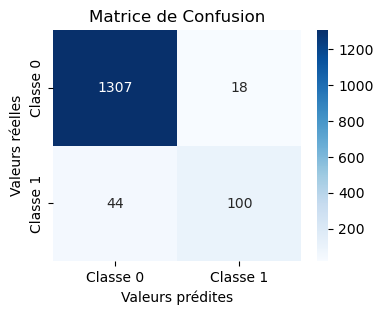

 Métriques d'évaluation pour le modèle Modèle Logit : 
Exactitude: 0.9577944179714091
Précision: 0.847
Rappel: 0.6944444444444444
L'AUC du modèle Modèle Logit est : 0.9559


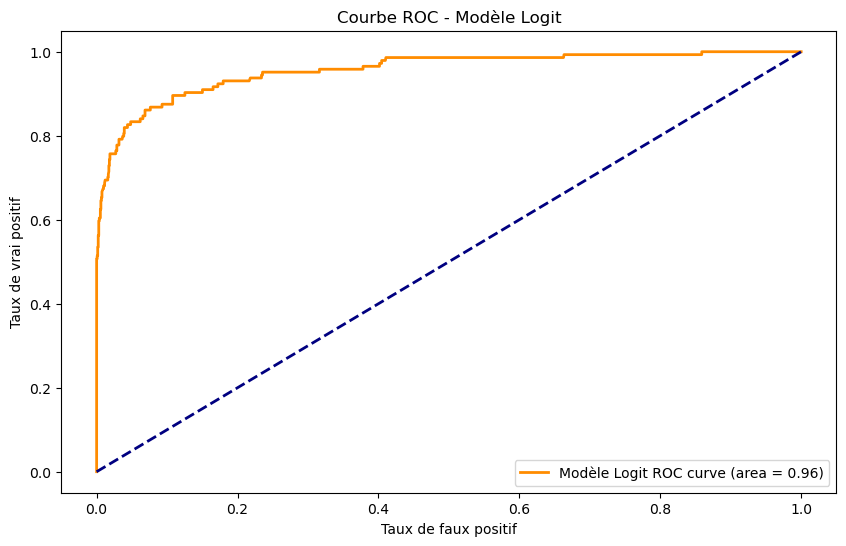

In [26]:
evaluate_model(result2,X1_t,y1_t,"Modèle Logit",plot_roc=True)

### On le fait avec la fonction Logisticregression de Sklearn ###

In [27]:
model = LogisticRegression(fit_intercept=False)
result3=model.fit(X1_a, y_a)
result3.coef_ 

array([[-9.98457421,  0.04847238,  0.32327795,  2.80462254,  2.81178229,
         1.9242435 ]])

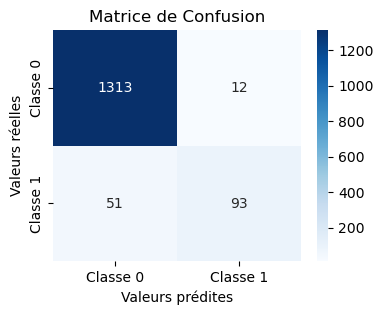

 Métriques d'évaluation pour le modèle Modèle Logit : 
Exactitude: 0.9571136827773996
Précision: 0.886
Rappel: 0.6458333333333334
L'AUC du modèle Modèle Logit est : 0.8184


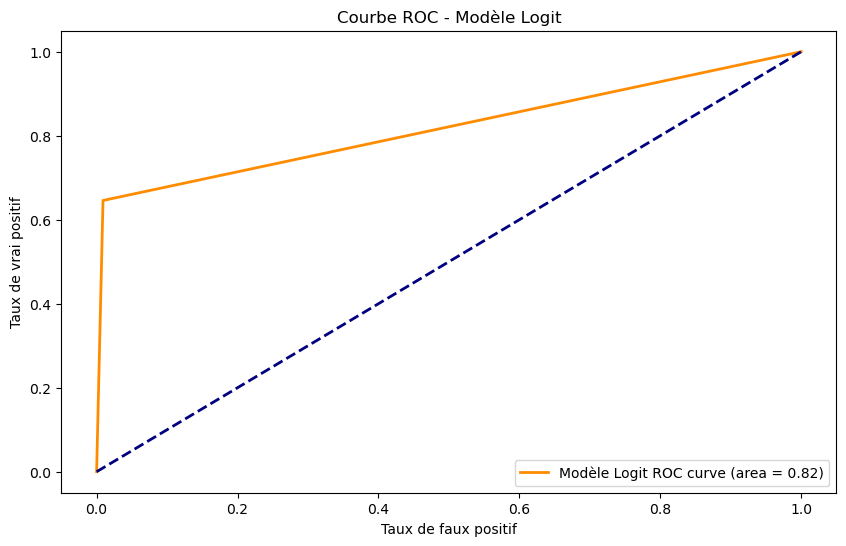

In [28]:
evaluate_model(result3,X1_t,y1_t,"Modèle Logit",plot_roc=True)

In [29]:
y_t=strat_test["PP_Oui"]
y_proba = result3.predict_proba(X1_t)
fpr, tpr, _ = roc_curve(y1_t,y_proba[:, 1])
auc_score = auc(fpr, tpr)
print("L'AUC du modèle est : " , auc_score)

L'AUC du modèle est :  0.9579061844863732


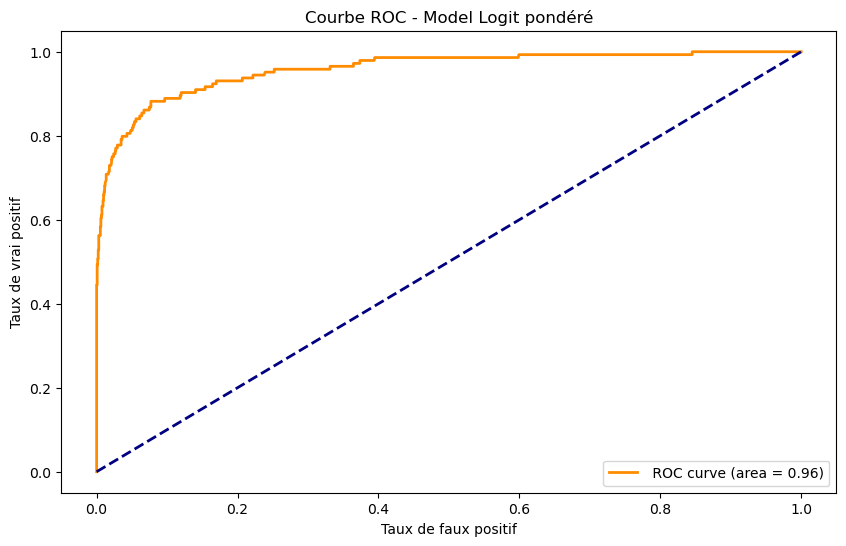

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=' ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe ROC - Model Logit pondéré')
plt.legend(loc='lower right')
plt.show()

In [31]:
logit = sm.GLM(y_a, X1_a, family=sm.families.Binomial())
result1_log=logit.fit()

In [32]:
result1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 PP_Oui   No. Observations:                 3425
Model:                            GLM   Df Residuals:                     3419
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -432.76
Date:                Sun, 04 Feb 2024   Deviance:                       865.52
Time:                        23:17:42   Pearson chi2:                 1.42e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3214
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5160      0.666    -20.300      0.000     -14.821     -12.211
RMM            0.0649      0.003     19.335      0.000       0.058       0.072
F              0.5469      0.088      6.248      0.000       0.375       0.718
Educ_2         4.1085      0.315     13.027      0.000       3.490       4.727
Educ_3         4.0953      0.307     13.332      0.000       3.493       4.697
CEL_Oui        2.4435      0.288      8.492      0.000       1.880       3.007
==============================================================================
"""

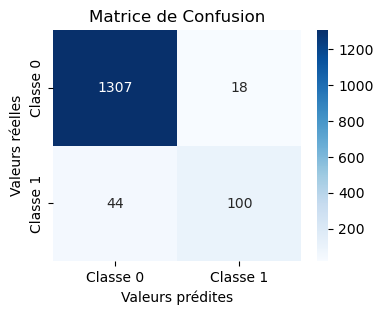

 Métriques d'évaluation pour le modèle Modèle Logit : 
Exactitude: 0.9577944179714091
Précision: 0.847
Rappel: 0.6944444444444444
L'AUC du modèle Modèle Logit est : 0.9559


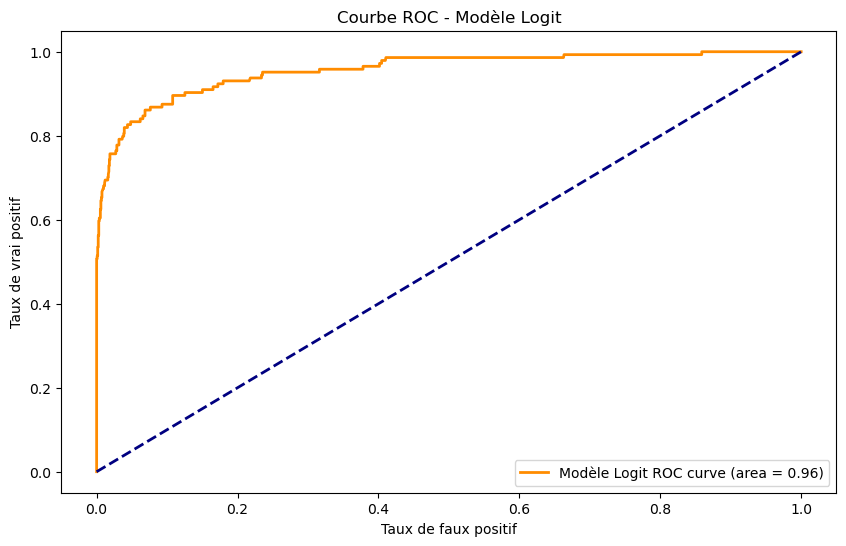

In [33]:
evaluate_model(result1_log,X1_t,y1_t,"Modèle Logit",plot_roc=True)

In [34]:
probit= sm.GLM(y_a, X1_a,family=sm.families.Binomial(link=sm.families.links.probit()))
result_probit=probit.fit()
result_probit.summary()

C:\Users\ASUS ROG Zephyrus S\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The probit link alias is deprecated. Use Probit instead. The probit link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 PP_Oui   No. Observations:                 3425
Model:                            GLM   Df Residuals:                     3419
Model Family:                Binomial   Df Model:                            5
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -449.66
Date:                Sun, 04 Feb 2024   Deviance:                       899.33
Time:                        23:17:42   Pearson chi2:                 9.15e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3147
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6286      0.288    -23.008      0.000      -7.193      -6.064
RMM            0.0320      0.001     21.450      0.000       0.029       0.035
F              0.2783      0.044      6.282      0.000       0.191       0.365
Educ_2         1.8333      0.145     12.615      0.000       1.548       2.118
Educ_3         1.8445      0.142     13.032      0.000       1.567       2.122
CEL_Oui        1.2758      0.148      8.643      0.000       0.987       1.565
==============================================================================
"""

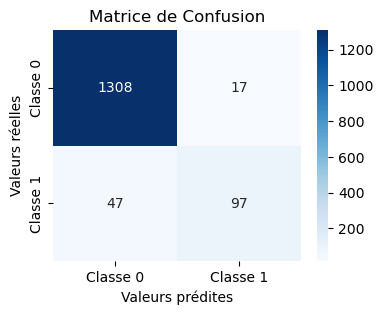

 Métriques d'évaluation pour le modèle Modèle Probit : 
Exactitude: 0.95643294758339
Précision: 0.851
Rappel: 0.6736111111111112
L'AUC du modèle Modèle Probit est : 0.9588


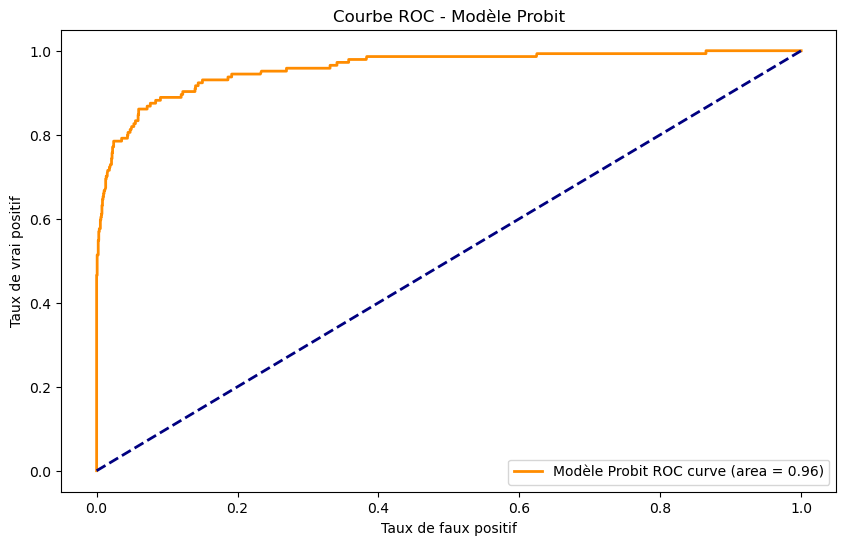

In [35]:
evaluate_model(result_probit,X1_t,y1_t,"Modèle Probit",plot_roc=True)

In [36]:
cloglog= sm.GLM(y_a, X1_a,family=sm.families.Binomial(link=sm.families.links.CLogLog()))
result_cloglog=cloglog.fit()
result_cloglog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 PP_Oui   No. Observations:                 3425
Model:                            GLM   Df Residuals:                     3419
Model Family:                Binomial   Df Model:                            5
Link Function:                CLogLog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -432.91
Date:                Sun, 04 Feb 2024   Deviance:                       865.82
Time:                        23:17:43   Pearson chi2:                 6.40e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.3214
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4384      0.515    -22.200      0.000     -12.448     -10.429
RMM            0.0517      0.003     20.582      0.000       0.047       0.057
F              0.4004      0.067      5.954      0.000       0.269       0.532
Educ_2         3.6943      0.254     14.566      0.000       3.197       4.191
Educ_3         3.6571      0.245     14.941      0.000       3.177       4.137
CEL_Oui        1.4463      0.217      6.680      0.000       1.022       1.871
==============================================================================
"""

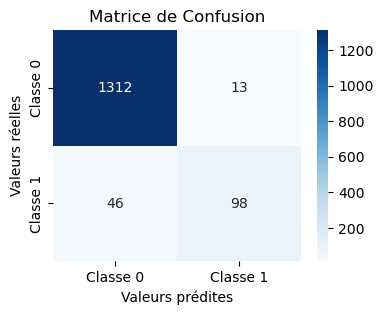

 Métriques d'évaluation pour le modèle Modèle LOG LOG : 
Exactitude: 0.9598366235534377
Précision: 0.883
Rappel: 0.6805555555555556
L'AUC du modèle Modèle LOG LOG est : 0.9480


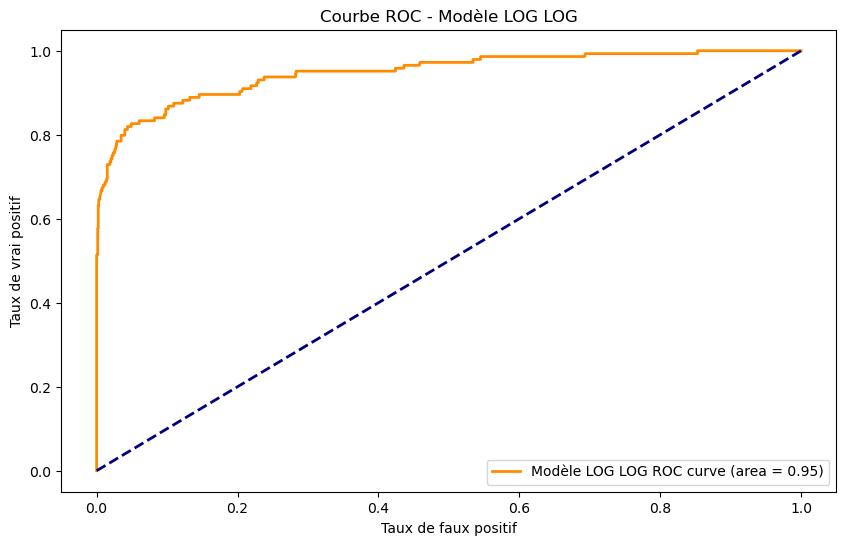

In [37]:
evaluate_model(result_cloglog,X1_t,y1_t,"Modèle LOG LOG",plot_roc=True)

### Pour les courbes ROC ###

In [38]:
## Logit

y_predict_L = result1_log.predict(X1_t)
fprL, tprL, _ = roc_curve(y1_t, y_predict_L)
auc_score_L = auc(fprL, tprL)

## Probit

y_predict_P = result_probit.predict(X1_t)
fprP, tprP, _ = roc_curve(y1_t, y_predict_P)
auc_score_P = auc(fprP, tprP)

## Cloglog

y_predict_Log = result_cloglog.predict(X1_t)
fprLog, tprLog, _ = roc_curve(y1_t, y_predict_Log)
auc_score_Log = auc(fprLog, tprLog)



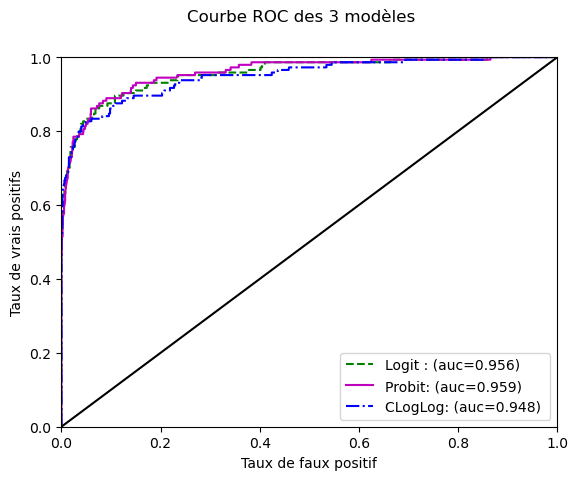

In [39]:
plt.plot(fprL,tprL,"g--",label='Logit : (auc={:.3f}) '.format(auc_score_L))
plt.plot(fprP,tprP,"m-",label='Probit: (auc={:.3f}) '.format(auc_score_P))
plt.plot(fprLog,tprLog,"b-.",label='CLogLog: (auc={:.3f}) '.format(auc_score_Log))

# Aléatoire

plt.plot([0,1],[0,1],"k-")  #, label="Aléatoire"

plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.suptitle("Courbe ROC des 3 modèles")
plt.show()

## Utilisation de ceci pour des données déséquilibrées

Dnas GLM de SM, il y a la possibilité de mettre les poids avec un eoption ***freq_weights***. Il s nécessaire d'avoir les poids pur toutes les valeurs de la variable dépendante.

### Evaluation avec les poids 

In [40]:
valeur = y_a.value_counts(normalize=True)
valeur

PP_Oui
0    0.90219
1    0.09781
Name: proportion, dtype: float64

In [41]:
valeur[y_a]

PP_Oui
0    0.90219
0    0.90219
0    0.90219
0    0.90219
0    0.90219
      ...   
0    0.90219
0    0.90219
0    0.90219
0    0.90219
0    0.90219
Name: proportion, Length: 3425, dtype: float64

In [42]:
inverse_frequences = 1 / valeur[y_a]
inverse_frequences

PP_Oui
0    1.108414
0    1.108414
0    1.108414
0    1.108414
0    1.108414
       ...   
0    1.108414
0    1.108414
0    1.108414
0    1.108414
0    1.108414
Name: proportion, Length: 3425, dtype: float64

In [43]:
X_t=strat_test.drop(columns=["PP_Oui"])

## Avec poids ##

In [44]:
logit3 = sm.GLM(y_a, X_a,freq_weights=inverse_frequences ,family=sm.families.Binomial())
result_log3=logit3.fit()
result_log3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 PP_Oui   No. Observations:                 3425
Model:                            GLM   Df Residuals:                  6843.00
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1757.8
Date:                Sun, 04 Feb 2024   Deviance:                       3515.5
Time:                        23:17:43   Pearson chi2:                 9.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.8256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0536      0.271    -37.065      0.000     -10.585      -9.522
RMM            0.0581      0.002     35.856      0.000       0.055       0.061
F              0.5483      0.040     13.803      0.000       0.470       0.626
DM             0.0001   2.63e-05      5.221      0.000    8.56e-05       0.000
Educ_2         2.7343      0.123     22.290      0.000       2.494       2.975
Educ_3         2.8280      0.121     23.338      0.000       2.591       3.066
CEL_Oui        2.5727      0.158     16.330      0.000       2.264       2.881
==============================================================================
"""

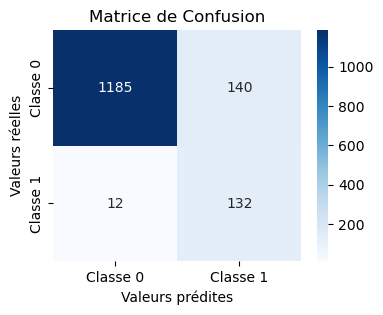

 Métriques d'évaluation pour le modèle Modèle avec les poids : 
Exactitude: 0.8965282505105514
Précision: 0.485
Rappel: 0.9166666666666666
L'AUC du modèle Modèle avec les poids est : 0.9657


In [45]:
evaluate_model(result_log3,X_t,y_t,"Modèle avec les poids")

In [46]:
# Créez un modèle de régression logistique
logistic_model = LogisticRegression()

In [47]:
# Créez un BaggingClassifier avec le modèle de régression logistique
bagging_logistic_model = BaggingClassifier(base_estimator=logistic_model, n_estimators=100)

C:\Users\ASUS ROG Zephyrus S\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ASUS ROG Zephyrus S\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS ROG Zephyrus S\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

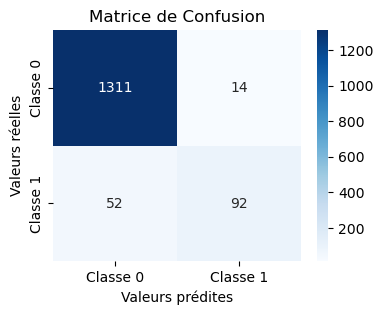

 Métriques d'évaluation pour le modèle Bagging Logit : 
Exactitude: 0.955071477195371
Précision: 0.868
Rappel: 0.6388888888888888
L'AUC du modèle Bagging Logit est : 0.8142


TypeError: cannot unpack non-iterable NoneType object

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Création du modèle de régression logistique avec statsmodels
logit3 = sm.GLM(y_a, X_a, freq_weights=inverse_frequences, family=sm.families.Binomial())
result_log3 = logit3.fit()

# Obtention des coefficients du modèle statsmodels
coef_statsmodels = result_log3.params

# Création du modèle de régression logistique avec scikit-learn
logit_sklearn = LogisticRegression(fit_intercept=False)
logit_sklearn.coef_ = np.column_stack((coef_statsmodels, np.zeros_like(coef_statsmodels)))

# Création du modèle Bagging avec le modèle logistique comme estimateur de base
Bag_Log = BaggingClassifier(base_estimator=logit_sklearn, n_estimators=100, random_state=42)
Bag_Log.fit(X_a, y_a)

# Évaluation du modèle
fpr_Bag2, tpr_Bag2, auc_Bag2 = evaluate_model(Bag_Log, X_t, y_t, "Bagging Logit")

In [49]:
probit3 = sm.GLM(y_a, X_a,freq_weights=inverse_frequences ,family=sm.families.Binomial(link=sm.families.links.probit()))
result_probit3=probit3.fit()
result_probit3.summary()

C:\Users\ASUS ROG Zephyrus S\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The probit link alias is deprecated. Use Probit instead. The probit link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 PP_Oui   No. Observations:                 3425
Model:                            GLM   Df Residuals:                  6843.00
Model Family:                Binomial   Df Model:                            6
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1786.6
Date:                Sun, 04 Feb 2024   Deviance:                       3573.2
Time:                        23:18:20   Pearson chi2:                 4.93e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.8226
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3471      0.130    -41.068      0.000      -5.602      -5.092
RMM            0.0310      0.001     39.525      0.000       0.029       0.032
F              0.2909      0.021     13.571      0.000       0.249       0.333
DM          7.989e-05   1.43e-05      5.595      0.000    5.19e-05       0.000
Educ_2         1.4442      0.064     22.549      0.000       1.319       1.570
Educ_3         1.4900      0.063     23.620      0.000       1.366       1.614
CEL_Oui        1.3316      0.083     15.995      0.000       1.168       1.495
==============================================================================
"""

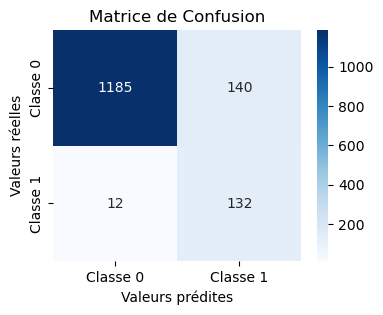

 Métriques d'évaluation pour le modèle Modèle avec les poids : 
Exactitude: 0.8965282505105514
Précision: 0.485
Rappel: 0.9166666666666666
L'AUC du modèle Modèle avec les poids est : 0.9658


In [50]:
evaluate_model(result_probit3,X_t,y_t,"Modèle avec les poids")

In [51]:
result_probit3.conf_int()

0         1
const   -5.602281 -5.091899
RMM      0.029427  0.032498
F        0.248893  0.332922
DM       0.000052  0.000108
Educ_2   1.318705  1.569770
Educ_3   1.366353  1.613630
CEL_Oui  1.168433  1.494770

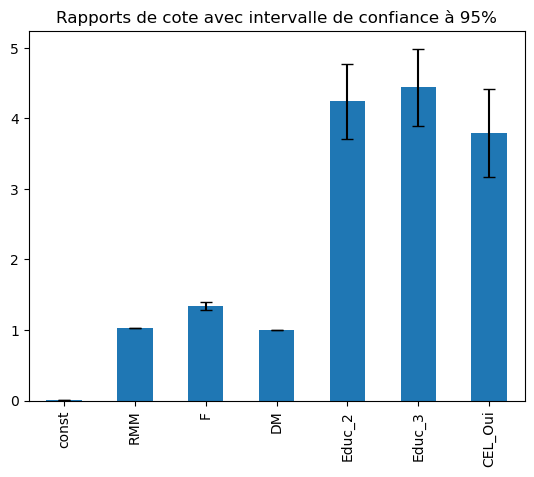

In [52]:
RC = np.exp(result_probit3.params)
CI = np.exp(result_probit3.conf_int())

fig, ax = plt.subplots()
RC.plot(ax=ax, kind='bar', yerr=(CI[1] - CI[0])/2, capsize=4)
ax.set_title('Rapports de cote avec intervalle de confiance à 95%')
plt.show()

C:\Users\ASUS ROG Zephyrus S\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ASUS ROG Zephyrus S\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS ROG Zephyrus S\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

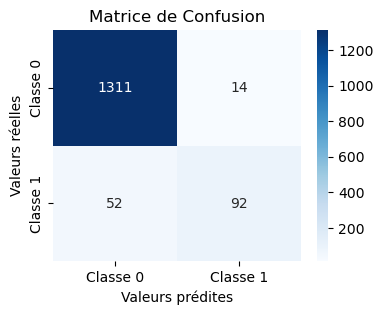

 Métriques d'évaluation pour le modèle Bagging Logit : 
Exactitude: 0.955071477195371
Précision: 0.868
Rappel: 0.6388888888888888
L'AUC du modèle Bagging Logit est : 0.8142


TypeError: cannot unpack non-iterable NoneType object

In [53]:
# Obtention des coefficients du modèle statsmodels
coef_statsmodels = result_probit3.params

# Création du modèle de régression logistique avec scikit-learn
logit_sklearn = LogisticRegression(fit_intercept=False)
logit_sklearn.coef_ = np.column_stack((coef_statsmodels, np.zeros_like(coef_statsmodels)))

# Création du modèle Bagging avec le modèle logistique comme estimateur de base
Bag_Log = BaggingClassifier(base_estimator=logit_sklearn, n_estimators=100, random_state=42)
Bag_Log.fit(X_a, y_a)

# Évaluation du modèle
fpr_Bag2, tpr_Bag2, auc_Bag2 = evaluate_model(Bag_Log, X_t, y_t, "Bagging Logit")

In [54]:
cloglog3 = sm.GLM(y_a, X_a,freq_weights=inverse_frequences ,family=sm.families.Binomial(link=sm.families.links.CLogLog()))
result_cloglog3=cloglog3.fit()
result_cloglog3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 PP_Oui   No. Observations:                 3425
Model:                            GLM   Df Residuals:                  6843.00
Model Family:                Binomial   Df Model:                            6
Link Function:                CLogLog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1811.1
Date:                Sun, 04 Feb 2024   Deviance:                       3622.2
Time:                        23:18:36   Pearson chi2:                 4.99e+13
No. Iterations:                   100   Pseudo R-squ. (CS):             0.8200
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0258      0.172    -40.847      0.000      -7.363      -6.689
RMM            0.0363      0.001     38.100      0.000       0.034       0.038
F              0.3623      0.025     14.766      0.000       0.314       0.410
DM          4.807e-05   1.51e-05      3.179      0.001    1.84e-05    7.77e-05
Educ_2         2.1264      0.078     27.318      0.000       1.974       2.279
Educ_3         2.1435      0.077     27.818      0.000       1.993       2.295
CEL_Oui        1.3035      0.086     15.099      0.000       1.134       1.473
==============================================================================
"""

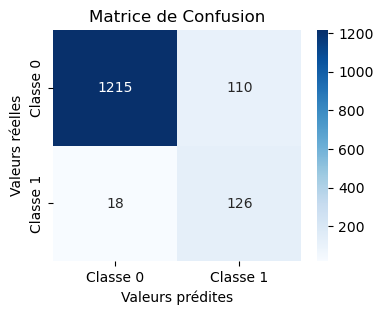

 Métriques d'évaluation pour le modèle Modèle avec les poids : 
Exactitude: 0.9128658951667801
Précision: 0.534
Rappel: 0.875
L'AUC du modèle Modèle avec les poids est : 0.9604


In [55]:
evaluate_model(result_cloglog3,X_t,y_t,"Modèle avec les poids")

In [56]:
## Logit

y_predict_L = result_log3.predict(X_t)
fprL, tprL, _ = roc_curve(y_t, y_predict_L)
auc_score_L = auc(fprL, tprL)

## Probit

y_predict_P = result_probit3.predict(X_t)
fprP, tprP, _ = roc_curve(y_t, y_predict_P)
auc_score_P = auc(fprP, tprP)

## Cloglog

y_predict_Log = result_cloglog3.predict(X_t)
fprLog, tprLog, _ = roc_curve(y_t, y_predict_Log)
auc_score_Log = auc(fprLog, tprLog)


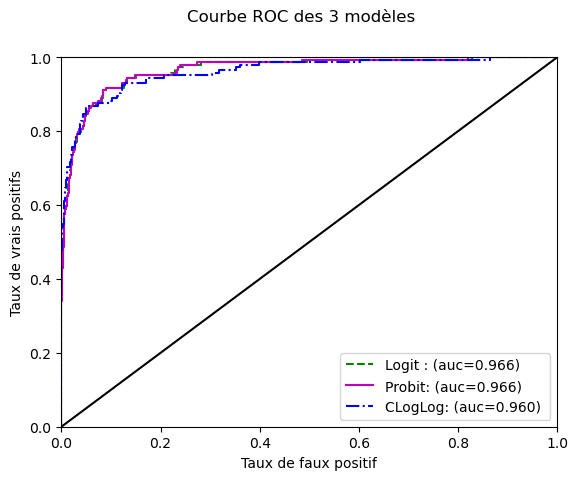

In [57]:
# pour le logit, Probit,SVM, Arbre Gini et Arbre Entropie

plt.plot(fprL,tprL,"g--",label='Logit : (auc={:.3f}) '.format(auc_score_L))
plt.plot(fprP,tprP,"m-",label='Probit: (auc={:.3f}) '.format(auc_score_P))
plt.plot(fprLog,tprLog,"b-.",label='CLogLog: (auc={:.3f}) '.format(auc_score_Log))

# Aléatoire

plt.plot([0,1],[0,1],"k-")  #, label="Aléatoire"

plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.suptitle("Courbe ROC des 3 modèles")
plt.show()

## ARBRES ##

In [58]:
# Pandas, Numpy, os et changement de répertoire de travail
import pandas as pd 
import pandas.plotting as pdl
import numpy as np 
import os
#os.chdir('C:/Users/peron/Documents/Travail/Enseignement/NoteBooks/NoteBooksPY')

# Scikit-Learn
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit  
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

# StatsModels
import statsmodels.api as sm

# Pour les graphiques 

%matplotlib  inline
# Ceci permet d'afficher les graphique directement dans l'output du notebbok
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
def evaluate_model(model, X_test, y_true, model_name,plot_roc=False):
    # Faire des prédictions
    y_predict = model.predict(X_test)
    y_proba=model.predict_proba(X_test)
    y_pred = ( y_predict > 0.5).astype(int)
    
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Matrice de Confusion')
    plt.show()

    # Calcul des métriques d'évaluation
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    

    # Affichage des métriques
    print('\033[1m',"Métriques d'évaluation pour le modèle {} :".format(model_name), '\033[0m')
    print("Exactitude:", accuracy)
    print("Précision:", round(precision, 3))
    print("Rappel:", recall)
    

    # Tracer la courbe ROC
    
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    auc_score = auc(fpr, tpr)
    print("L'AUC du modèle {} est : {:.4f}".format(model_name, auc_score))
    
    if plot_roc:
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='{} ROC curve (area = {:.2f})'.format(model_name, auc_score))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('Taux de faux positif')
        plt.ylabel('Taux de vrai positif')
        plt.title('Courbe ROC - {}'.format(model_name))
        plt.legend(loc='lower right')
        plt.show()

In [60]:
df=pd.read_csv("C:/Users/ASUS ROG Zephyrus S/Desktop/Downloads/Banque (1).csv", sep=";", decimal=",",encoding="latin1")
df.head()

ID  Age  Experience  Revenu Millier    Famille  \
0   1   25           1                 49        4   
1   2   45          19                 34        3   
2   3   39          15                 11        1   
3   4   35           9                100        1   
4   5   35           8                 45        4   

   Dépense mensuellesmoyenne     Education Compte Epargne Logement  \
0                           1600          1                     Non   
1                           1500          1                     Non   
2                           1000          1                     Non   
3                           2700          2                     Non   
4                           1000          2                     Non   

  Prêt Personnel  
0            Non  
1            Non  
2            Non  
3            Non  
4            Non

In [61]:
df=df.drop(columns=['ID'])
var = df.columns
print(var)

Index(['Age', 'Experience', 'Revenu Millier  ', 'Famille',
       'Dépense mensuellesmoyenne   ', 'Education', 'Compte Epargne Logement',
       'Prêt Personnel'],
      dtype='object')


In [62]:
df.columns=['Age','Exp','RM','F','DM','Educ','CEL','PP']

In [63]:
df2 = pd.get_dummies(df, columns=(["CEL","PP"]),drop_first=True).astype(int)
df2[0:3]

Age  Exp  RM  F    DM  Educ  CEL_Oui  PP_Oui
0   25    1  49  4  1600     1        0       0
1   45   19  34  3  1500     1        0       0
2   39   15  11  1  1000     1        0       0

In [64]:
df3 = pd.get_dummies(df2, columns=(['Educ'])).astype(int)
df3[0:3]

Age  Exp  RM  F    DM  CEL_Oui  PP_Oui  Educ_1  Educ_2  Educ_3
0   25    1  49  4  1600        0       0       1       0       0
1   45   19  34  3  1500        0       0       1       0       0
2   39   15  11  1  1000        0       0       1       0       0

In [65]:
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=452)
for train_index, test_index in strat.split(df3, df3["PP_Oui"]):
    strat_train = df3.loc[train_index]
    strat_test = df3.loc[test_index]

In [66]:
strat_train["PP_Oui"].value_counts()
strat_train["PP_Oui"].value_counts(normalize=True)

PP_Oui
0    0.90219
1    0.09781
Name: proportion, dtype: float64

In [67]:
X_a=strat_train.drop(columns=["PP_Oui"])
X_a.head(), type(X_a)

(      Age  Exp   RM  F    DM  CEL_Oui  Educ_1  Educ_2  Educ_3
 1225   34   10  110  1  4000        0       1       0       0
 1615   29    4   73  1   800        0       0       1       0
 3646   39   13   43  3   500        0       0       0       1
 3049   31    5   50  4  2100        0       0       0       1
 4823   57   33   28  1  1200        0       0       0       1,
 pandas.core.frame.DataFrame)

In [68]:
y_a=strat_train["PP_Oui"]
y_a.head(), type(y_a)

(1225    0
 1615    0
 3646    0
 3049    0
 4823    0
 Name: PP_Oui, dtype: int32,
 pandas.core.series.Series)

In [69]:
X1_t=strat_test.drop(columns=["PP_Oui"])

In [70]:
y1_t=strat_test["PP_Oui"]

In [71]:
clf = DecisionTreeClassifier()
clf.fit(X_a, y_a)

DecisionTreeClassifier()

In [72]:
# Nombre de feuilles
num_leaves = clf.get_n_leaves()

# Nombre de nœuds 
num_branches = clf.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  62
Nombre de nœuds internes :  123


In [73]:
clf = DecisionTreeClassifier(min_samples_split = 70,min_samples_leaf = 30,max_depth =5,random_state=3)
clf.fit(X_a, y_a)

# Nombre de feuilles
num_leaves = clf.get_n_leaves()
# Nombre de nœuds 
num_branches = clf.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  13
Nombre de nœuds internes :  25


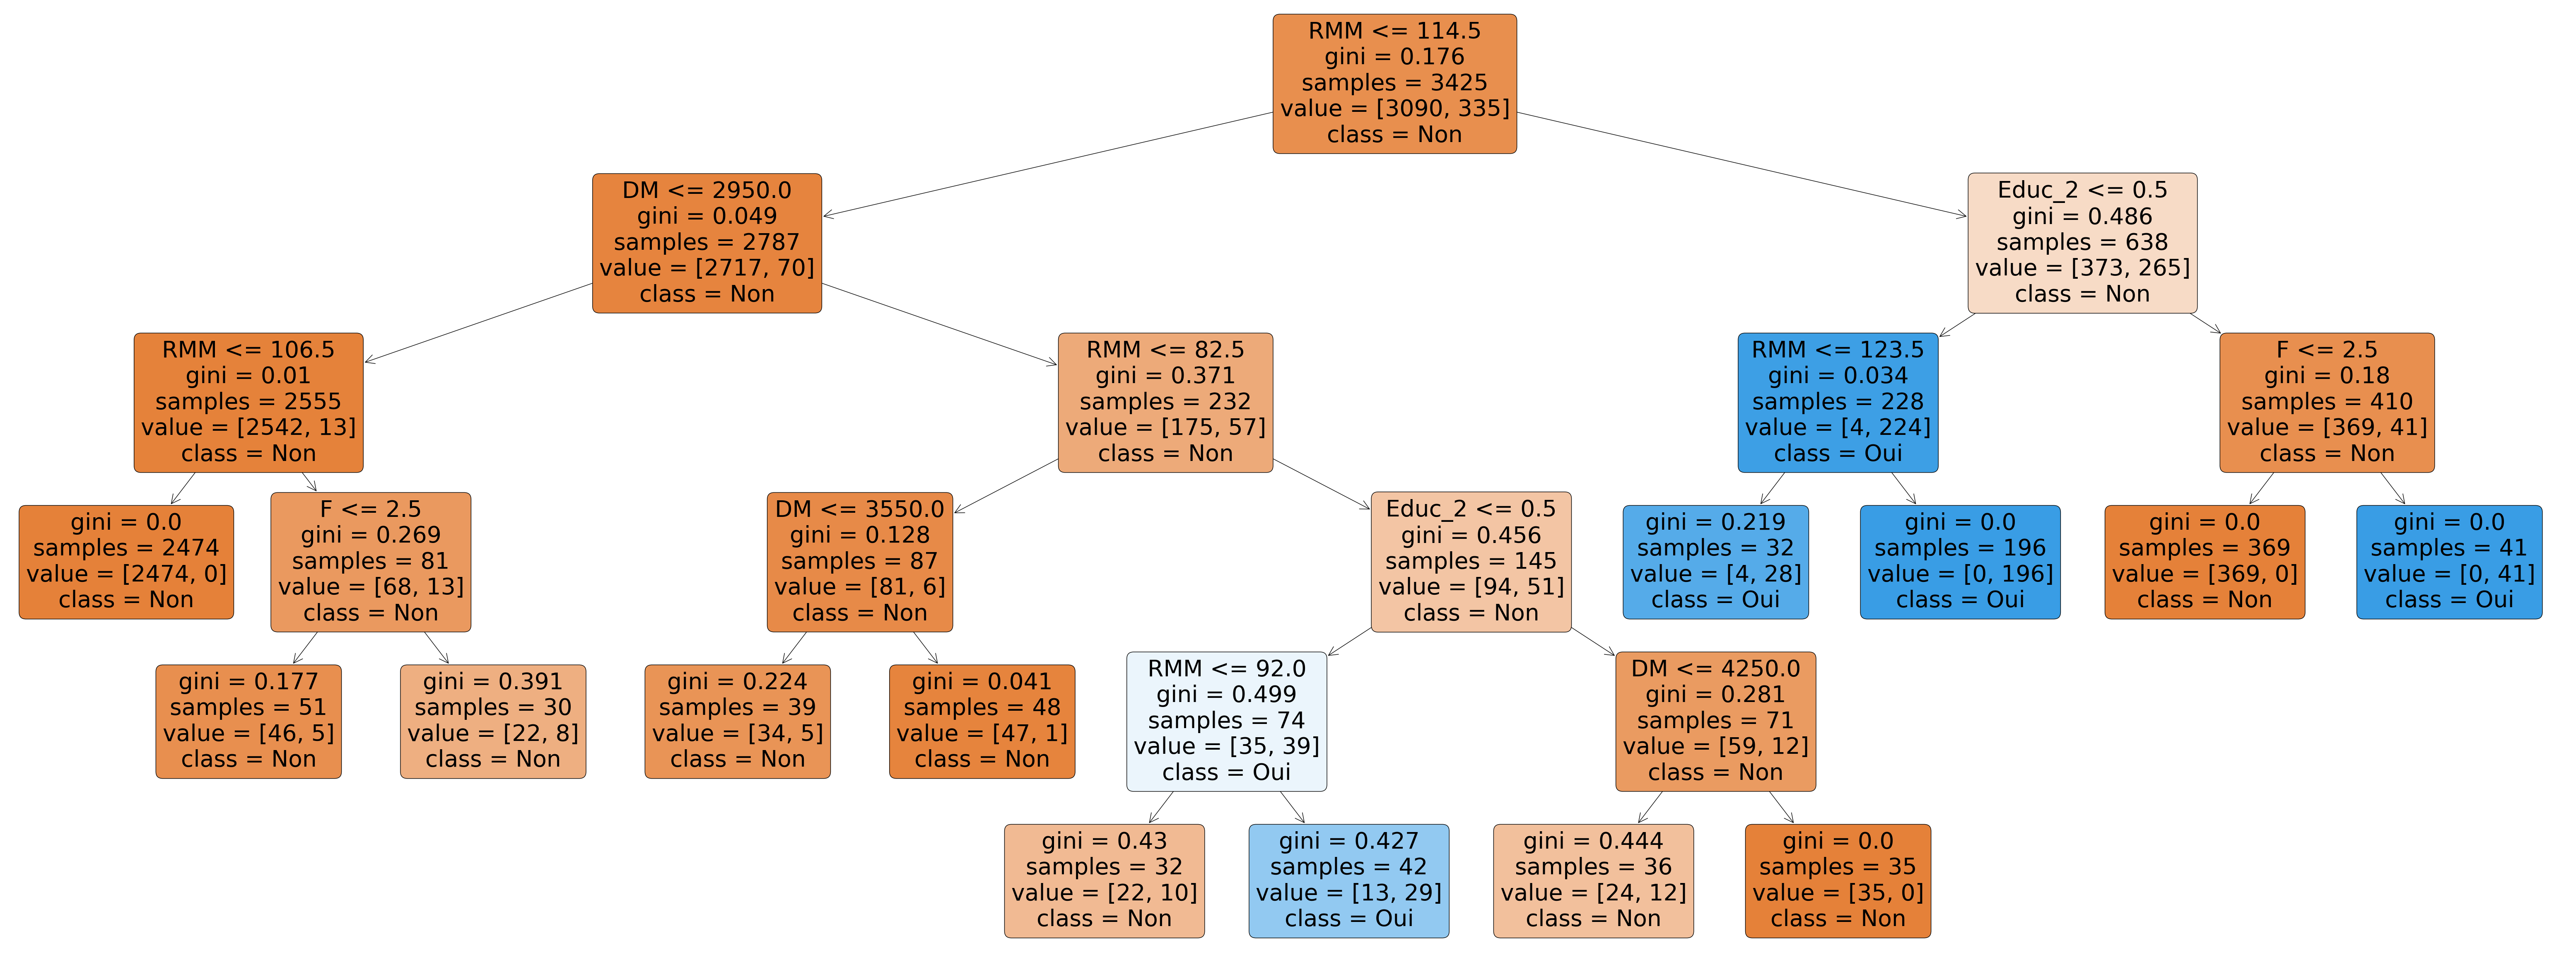

In [74]:
# Taille de la figure
plt.figure(figsize=(80, 30))

# Représentation de l'arbre
plot_tree(clf, feature_names=['Age','Exp','RMM','F','DM','Educ_1','Educ_2','Educ_3','CEL_Oui'], class_names=["Non","Oui"], filled=True, proportion=False, rounded=True)

# Afficher l'arbre
plt.show()

## Evaluation de l'arbre ##

In [75]:
ypred=clf.predict(X1_t)

In [76]:
ypred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
clf.predict_proba(X1_t)[:,1][:10]

array([0.        , 0.        , 0.26666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

 Métriques d'évaluation pour l'arbre :
Exactitude: 0.9877467665078284
Précision: 0.957
Rappel: 0.9166666666666666
Matrice de confusion:


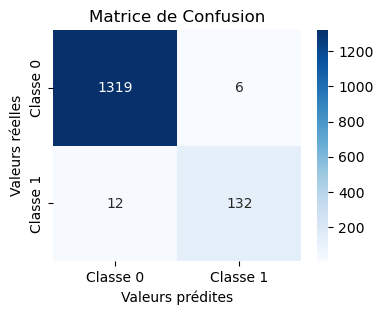

In [78]:
# Calcul des métriques d'évaluation
accuracy = accuracy_score(y1_t, ypred)
precision = precision_score(y1_t, ypred)
recall = recall_score(y1_t, ypred)

# Affichage des métriques
print('\033[1m',"Métriques d'évaluation pour l'arbre :")
print("Exactitude:", accuracy)
print("Précision:", round(precision, 3))
print("Rappel:", recall)


# Affichage de la matrice de confusion
print("Matrice de confusion:")
conf_matrix = confusion_matrix(y1_t, ypred)
# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de Confusion')
plt.show()

In [79]:
clf.predict_proba(X1_t)[:,1]

array([0.        , 0.        , 0.26666667, ..., 0.33333333, 0.        ,
       1.        ])

### Courbe ROC

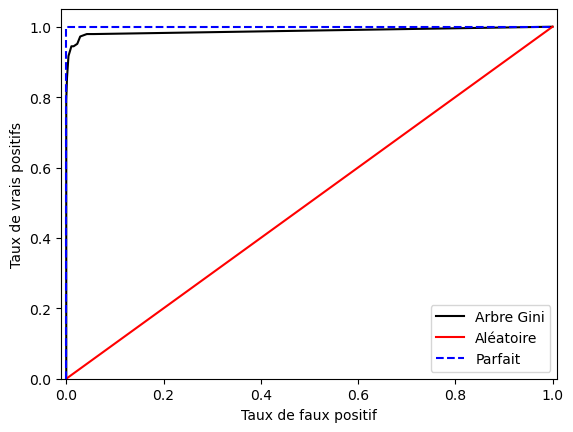

In [80]:
fpr,tpr,tr=roc_curve(y1_t,clf.predict_proba(X1_t)[:,1])

# pour le logit
plt.plot(fpr,tpr,"k-",label="Arbre Gini")

# Aléatoire
plt.plot([0,1],[0,1],"r-", label="Aléatoire")

# Parfait 

plt.plot([0,0,1], [0,1,1],"b--",label="Parfait")
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([-0.01,1.01])
plt.ylim([0.0,1.05])
plt.legend()
plt.show()

In [81]:
au = auc(fpr, tpr) 
round(au,4)

0.9876

**Utilisation de la fonction défini au début du script "Evaluate model"**

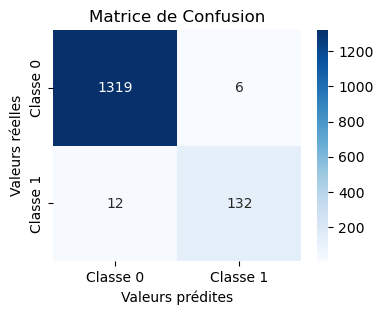

 Métriques d'évaluation pour le modèle Arbre Gini : 
Exactitude: 0.9877467665078284
Précision: 0.957
Rappel: 0.9166666666666666
L'AUC du modèle Arbre Gini est : 0.9876


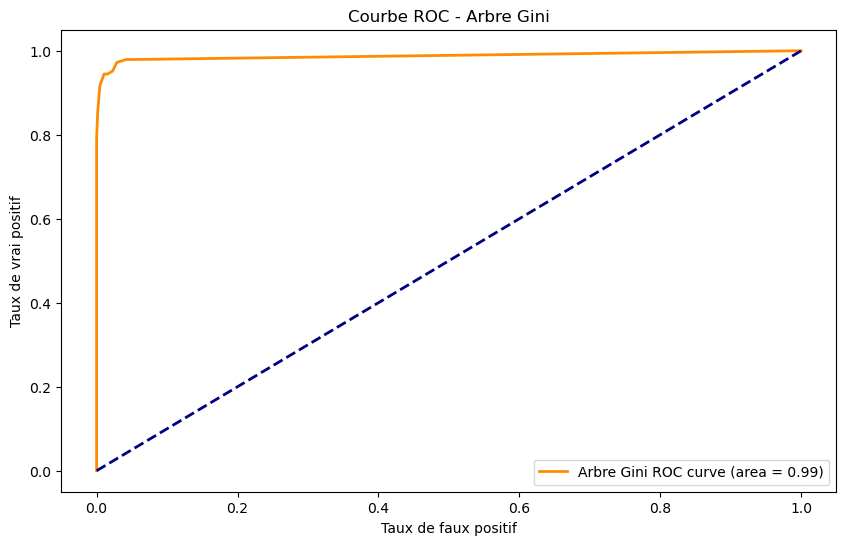

In [82]:
evaluate_model(clf, X1_t, y1_t, "Arbre Gini",plot_roc=True)

### Comparaison entre les arbre avec Gini et Entropie ###

In [83]:
# Gini

clf_G= DecisionTreeClassifier(min_samples_split = 70,min_samples_leaf = 30,max_depth =5)
clf_G.fit(X_a, y_a)

# Nombre de feuilles
num_leaves = clf_G.get_n_leaves()
# Nombre de nœuds 
num_branches = clf_G.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  13
Nombre de nœuds internes :  25


In [84]:
# Entropie

clf_E = DecisionTreeClassifier(criterion='entropy',min_samples_split = 70,min_samples_leaf = 30,max_depth =5)
clf_E.fit(X_a, y_a)

# Nombre de feuilles
num_leaves = clf_E.get_n_leaves()
# Nombre de nœuds 
num_branches = clf_E.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  11
Nombre de nœuds internes :  21


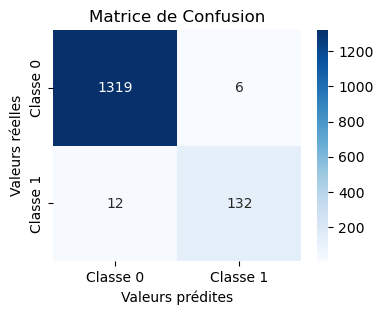

 Métriques d'évaluation pour le modèle Modèle de Gini : 
Exactitude: 0.9877467665078284
Précision: 0.957
Rappel: 0.9166666666666666
L'AUC du modèle Modèle de Gini est : 0.9876


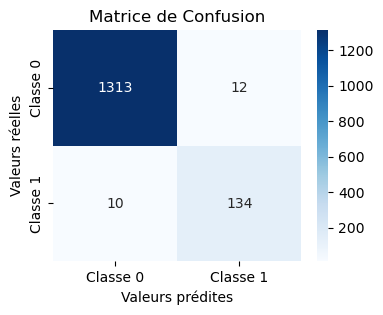

 Métriques d'évaluation pour le modèle Modèle de Entropie : 
Exactitude: 0.9850238257317904
Précision: 0.918
Rappel: 0.9305555555555556
L'AUC du modèle Modèle de Entropie est : 0.9971


In [85]:
## Gini

evaluate_model(clf_G,X1_t,y1_t,"Modèle de Gini")

## Entropie

evaluate_model(clf_E,X1_t,y1_t,"Modèle de Entropie")


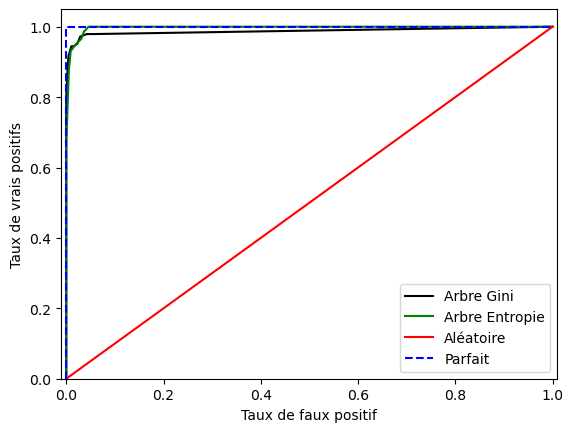

In [86]:
ypredG_prob=clf_G.predict_proba(X1_t)
ypredE_prob=clf_E.predict_proba(X1_t)

fprG,tprG,trG=roc_curve(y1_t,ypredG_prob[:,1])
fprE,tprE,trE=roc_curve(y1_t,ypredE_prob[:,1])


plt.plot(fprG,tprG,"k-",label="Arbre Gini")
plt.plot(fprE,tprE,"g-",label="Arbre Entropie")

# Aléatoire
plt.plot([0,1],[0,1],"r-", label="Aléatoire")

# Parfait 

plt.plot([0,0,1], [0,1,1],"b--",label="Parfait")
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([-0.01,1.01])
plt.ylim([0.0,1.05])
plt.legend()
plt.show()


In [87]:
auG = auc(fprG, tprG) 
auE = auc(fprE, tprE) 
print("L'AUC pour les eux estimations sont :")
print("Pour Gini " , round(auG,4))
print("Pour Entropie " , round(auE,4))

L'AUC pour les eux estimations sont :
Pour Gini  0.9876
Pour Entropie  0.9971


#### Importance des variables explicatives ####

Il s'agit d'avoir une mesure de la diminution de l'impureté (avec Gini ou l'Entropie) des différentes variables explicatives.

[Voir ici.](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

In [88]:
clf.feature_importances_

array([0.        , 0.        , 0.34130224, 0.14445125, 0.05607252,
       0.        , 0.45817399, 0.        , 0.        ])

Importance des variables explicatives (ordonnées par importance décroissante):
Educ_1: 0.4581739946721018
RM: 0.3413022370275064
F: 0.1444512525654611
DM: 0.056072515734930765
Age: 0.0
Exp: 0.0
CEL_Oui: 0.0
Educ_2: 0.0
Educ_3: 0.0


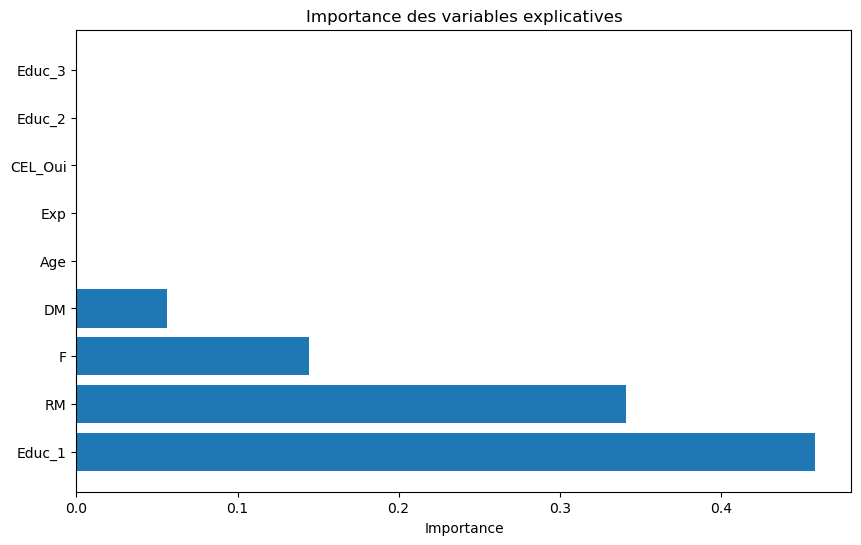

In [89]:

# Obtenir l'importance des variables explicatives
Importance = clf.feature_importances_

# Associer l'importance à chaque nom de fonctionnalité
Noms = list(X_a.columns)
Importance_dict = dict(zip(Noms, Importance))

# Trier les variables par leur importance
Importance_Classer = {k: v for k, v in sorted(Importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Afficher l'importance des variables
print("Importance des variables explicatives (ordonnées par importance décroissante):")
for feature, importance in Importance_Classer.items():
    print(f"{feature}: {importance}")

# Tracer un graphique d'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(range(len(Importance_Classer)), list(Importance_Classer.values()), align='center')
plt.yticks(range(len(Importance_Classer)), list(Importance_Classer.keys()))
plt.xlabel('Importance')
plt.title('Importance des variables explicatives')
plt.show()

## Quelques remarques concernant l'élagage

Il y a un paarmètre particulier qui s'appelle &alpha;, c'est un paramètre de complexité du modèle. Plus il est faible, plus c'est complexe et inversement, plus il est élevé plus il y aura de l'élagage de l'arbre.

Pour se faire une idée de quelles valeurs seraient appropriées, scikit-learn renvoie les alphas effectifs et les impuretés totales des feuilles correspondantes à chaque étape du processus d’élagage. Au fur et à mesure que l’alpha augmente, une plus grande partie de l’arbre est taillée, ce qui augmente l’impureté totale de ses feuilles.


In [90]:
clf = DecisionTreeClassifier()
alpha_impur = clf.cost_complexity_pruning_path(X_a, y_a)
ccp_alphas, impurities = alpha_impur.ccp_alphas, alpha_impur.impurities

In [91]:
ccp_alphas

array([0.        , 0.0001844 , 0.00019111, 0.00024331, 0.00025026,
       0.00025547, 0.00026543, 0.00028534, 0.00028965, 0.00033368,
       0.00038929, 0.00038929, 0.00038929, 0.00038929, 0.00041924,
       0.00042217, 0.00043796, 0.00044491, 0.00045628, 0.00046345,
       0.00052342, 0.00054617, 0.00054792, 0.00057097, 0.00060309,
       0.0006326 , 0.00077645, 0.00080839, 0.00085312, 0.00090289,
       0.00117972, 0.00191534, 0.00196145, 0.00392697, 0.00718966,
       0.02154745, 0.05639764])

Text(0.5, 1.0, 'Impureté selon le alpha')

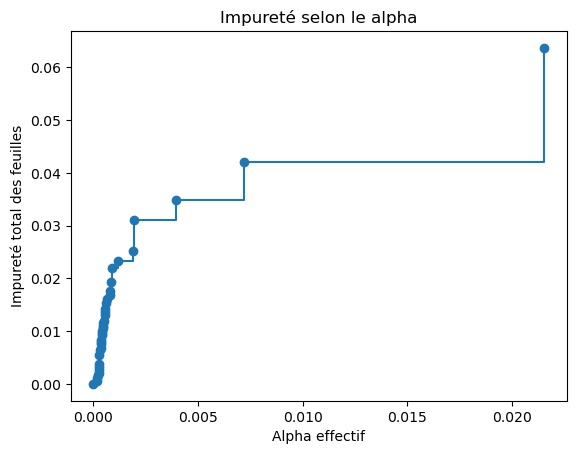

In [92]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Alpha effectif")
ax.set_ylabel("Impureté total des feuilles")
ax.set_title("Impureté selon le alpha")

In [93]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier( ccp_alpha=ccp_alpha)
    clf.fit(X_a, y_a)
    clfs.append(clf)

clfs[:5]

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.000184402612370342),
 DecisionTreeClassifier(ccp_alpha=0.00019110816191108157),
 DecisionTreeClassifier(ccp_alpha=0.00024330900243309004),
 DecisionTreeClassifier(ccp_alpha=0.00025026068821689263)]

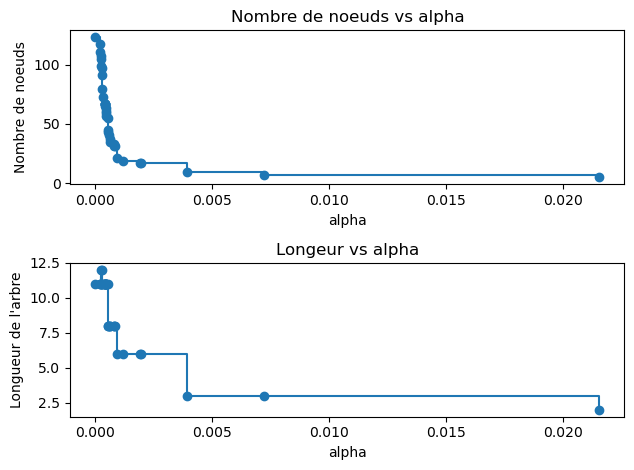

In [94]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier( ccp_alpha=ccp_alpha)
    clf.fit(X_a, y_a)
    clfs.append(clf)
clfs = clfs[:-1]   ### On enlève ceci car il s'agit de celui avec un seul noeud.
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Nombre de noeuds")
ax[0].set_title("Nombre de noeuds vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Longueur de l'arbre")
ax[1].set_title("Longeur vs alpha")
fig.tight_layout()

# depth

In [95]:
df=pd.DataFrame({'Longueur': depth, 'Alpha': ccp_alphas})
df

Longueur     Alpha
0         11  0.000000
1         11  0.000184
2         11  0.000191
3         11  0.000243
4         12  0.000250
5         11  0.000255
6         12  0.000265
7         11  0.000285
8         11  0.000290
9         11  0.000334
10        11  0.000389
11        11  0.000389
12        11  0.000389
13        11  0.000389
14        11  0.000419
15        11  0.000422
16        11  0.000438
17        11  0.000445
18        11  0.000456
19        11  0.000463
20        11  0.000523
21         8  0.000546
22         8  0.000548
23         8  0.000571
24         8  0.000603
25         8  0.000633
26         8  0.000776
27         8  0.000808
28         8  0.000853
29         6  0.000903
30         6  0.001180
31         6  0.001915
32         6  0.001961
33         3  0.003927
34         3  0.007190
35         2  0.021547

In [96]:
df.loc[df['Longueur']==5, 'Alpha']

Series([], Name: Alpha, dtype: float64)

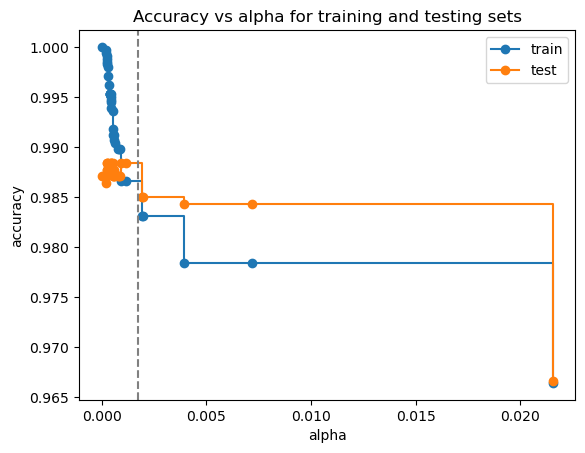

In [97]:
train_scores = [clf.score(X_a, y_a) for clf in clfs]
test_scores = [clf.score(X1_t, y1_t) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
ax.axvline(x=0.001716, linestyle='--', color='gray', label='Vertical Line')
ax.annotate('Alpha=0.005334', xy=(0.001716, 0.8), xytext=(0.001716 + 0.001, 0.8),arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8)
plt.show()

In [98]:
Adf=pd.DataFrame({"Alpha":ccp_alphas , "Score_test":test_scores})
indice_max_Alpha = Adf["Score_test"].idxmax()
Adf.loc[indice_max_Alpha, "Alpha"]

0.00024330900243309004

In [99]:
df.loc[df['Alpha']==Adf.loc[indice_max_Alpha, "Alpha"], 'Longueur']

3    11
Name: Longueur, dtype: int64

In [100]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Supposons que X_a et y_a sont vos features et variables cibles respectivement

# Calculer les scores de validation croisée pour différentes valeurs d'alpha
cv_scores = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha)
    scores = cross_val_score(clf, X_a, y_a, cv=5, scoring='accuracy')  # Vous pouvez changer la métrique selon vos besoins
    cv_scores.append(np.mean(scores))

# Trouver l'alpha qui donne les meilleurs scores
best_alpha = ccp_alphas[np.argmax(cv_scores)]

print("Best Alpha:", best_alpha)

# Vous pouvez ensuite utiliser la meilleure valeur d'alpha pour créer votre modèle final
final_model = DecisionTreeClassifier(ccp_alpha=best_alpha)
final_model.fit(X_a, y_a)

# Évaluer la performance du modèle final sur un ensemble de test, si nécessaire
# ...


Best Alpha: 0.0011797225921146692


DecisionTreeClassifier(ccp_alpha=0.0011797225921146692)

## **Si il y a des données très déséquilibrées** ##

Ceci va avoir une influence très importante sur l'arbre car il va maleheureusement accorder beaucouo d'imortance à la classe la mieux représenté.

Nos allons simuler les données et ensuite faire un arbre qui ignore le poids et autre avec des poids différents.

In [101]:
clf1 = DecisionTreeClassifier(min_samples_split = 500,min_samples_leaf = 50,max_depth =5)
clf1.fit(X_a, y_a)

# Nombre de feuilles
num_leaves = clf1.get_n_leaves()
# Nombre de nœuds 
num_branches = clf1.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  5
Nombre de nœuds internes :  9


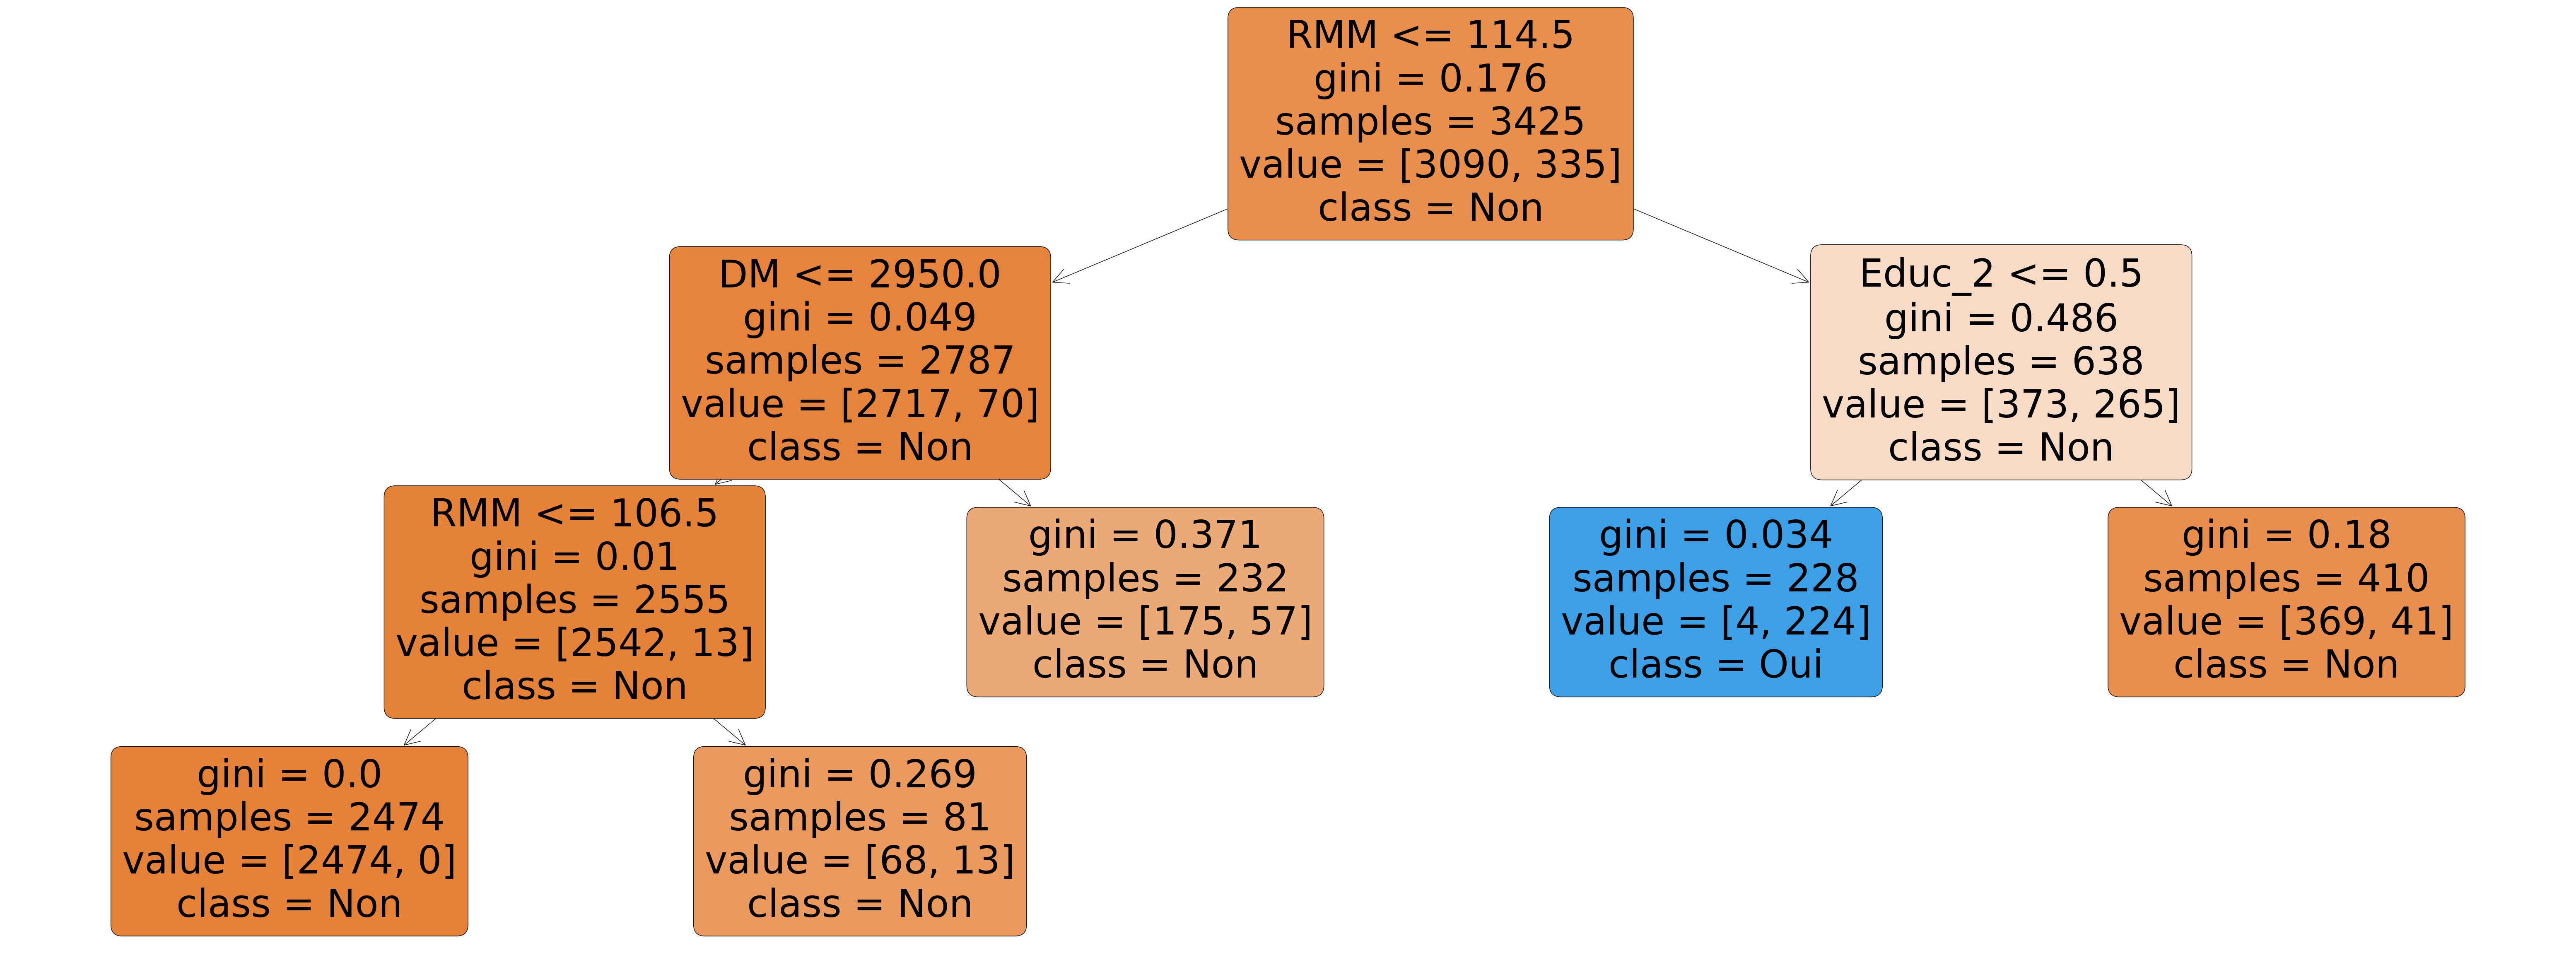

In [102]:
plt.figure(figsize=(80, 30))
## Représentation :  
plot_tree(clf1, feature_names=['Age','Exp','RMM','F','DM','Educ_1','Educ_2','Educ_3','CEL_Oui'], class_names=["Non", "Oui"],filled=True,proportion=False,rounded=True )
#plt.savefig("Arbre1.png")
plt.show()

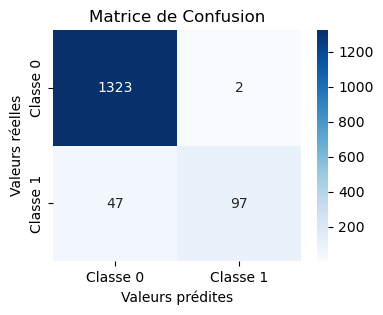

 Métriques d'évaluation pour le modèle Arbre Gini : 
Exactitude: 0.966643975493533
Précision: 0.98
Rappel: 0.6736111111111112
L'AUC du modèle Arbre Gini est : 0.9726


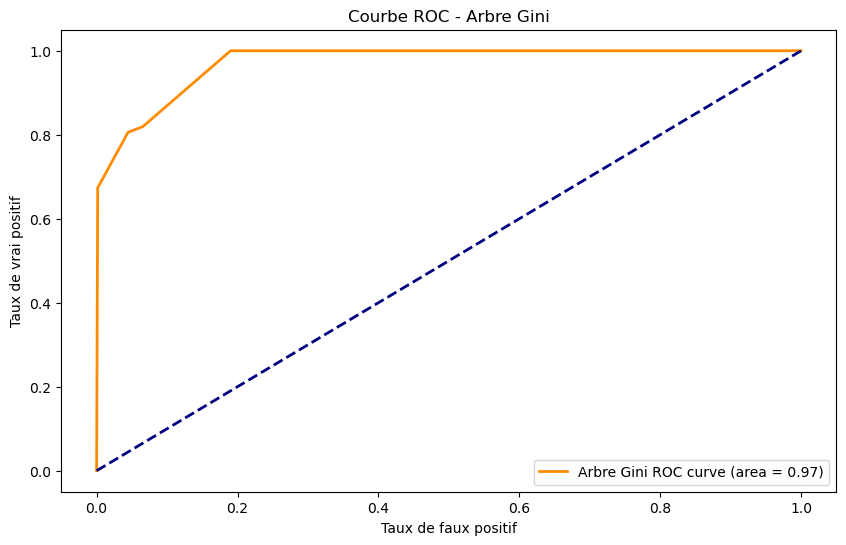

In [103]:
evaluate_model(clf1, X1_t, y1_t, "Arbre Gini",plot_roc=True)

### En tenant compte du déséquilibre

Il y a une options importantes **class_weight** qui permet de gérer les poids. Avec ***"balanced*** les poids sont associés à l'inverse des fréquences de la variables expliquées.

In [104]:
clf2 = DecisionTreeClassifier(class_weight='balanced',min_samples_split = 500,min_samples_leaf = 50,max_depth =5)
clf2.fit(X_a, y_a)

# Nombre de feuilles
num_leaves = clf2.get_n_leaves()
# Nombre de nœuds 
num_branches = clf2.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  5
Nombre de nœuds internes :  9


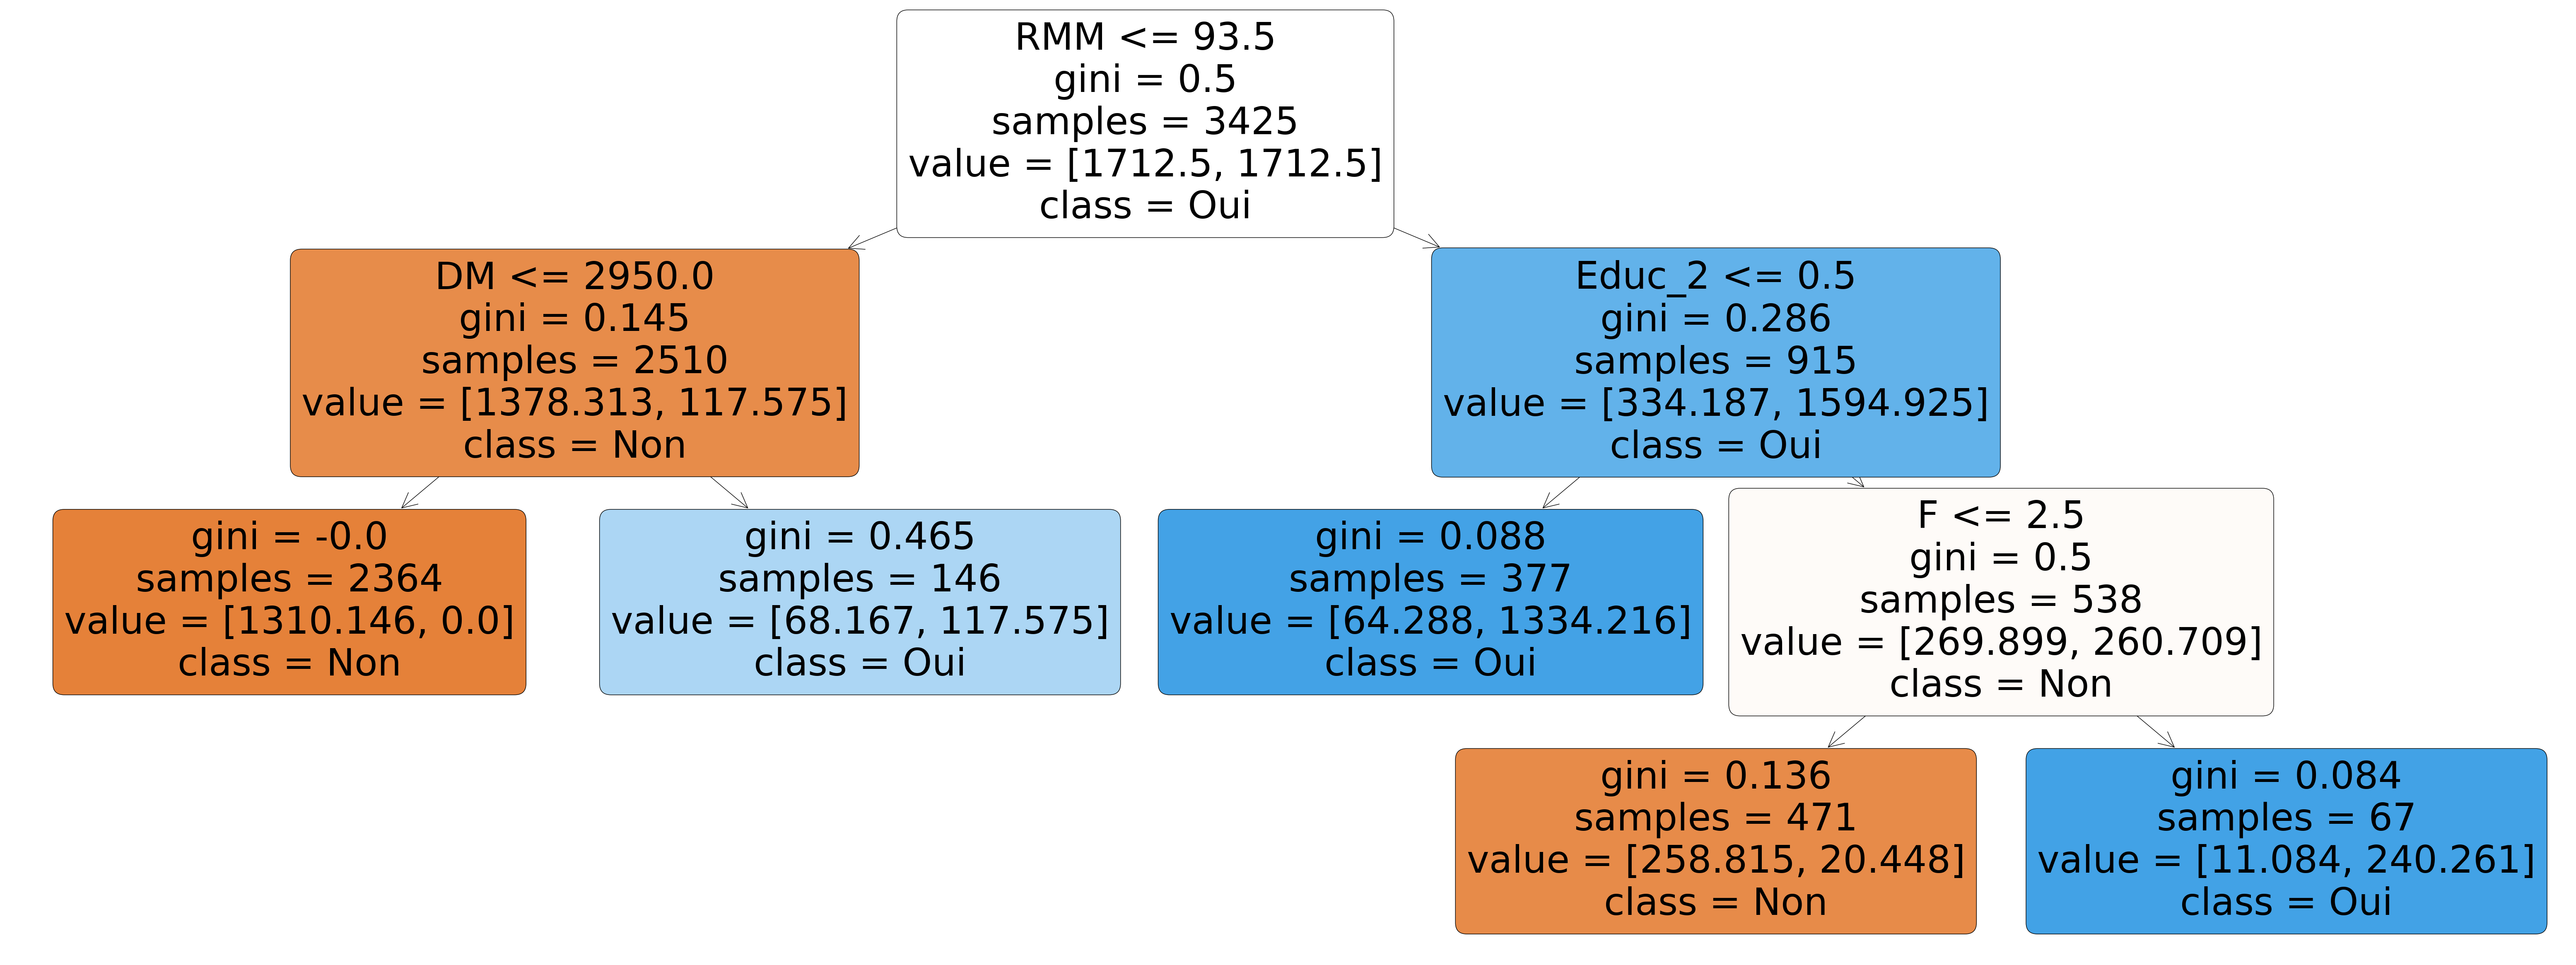

In [105]:
plt.figure(figsize=(80, 30))
## Représentation :  
plot_tree(clf2, feature_names=['Age','Exp','RMM','F','DM','Educ_1','Educ_2','Educ_3','CEL_Oui'], class_names=["Non", "Oui"],filled=True,proportion=False,rounded=True )
#plt.savefig("Arbre2.png")
plt.show()

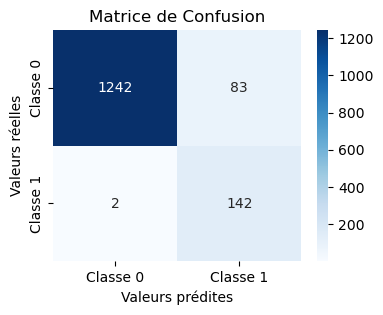

 Métriques d'évaluation pour le modèle Arbre Gini : 
Exactitude: 0.94213750850919
Précision: 0.631
Rappel: 0.9861111111111112
L'AUC du modèle Arbre Gini est : 0.9811


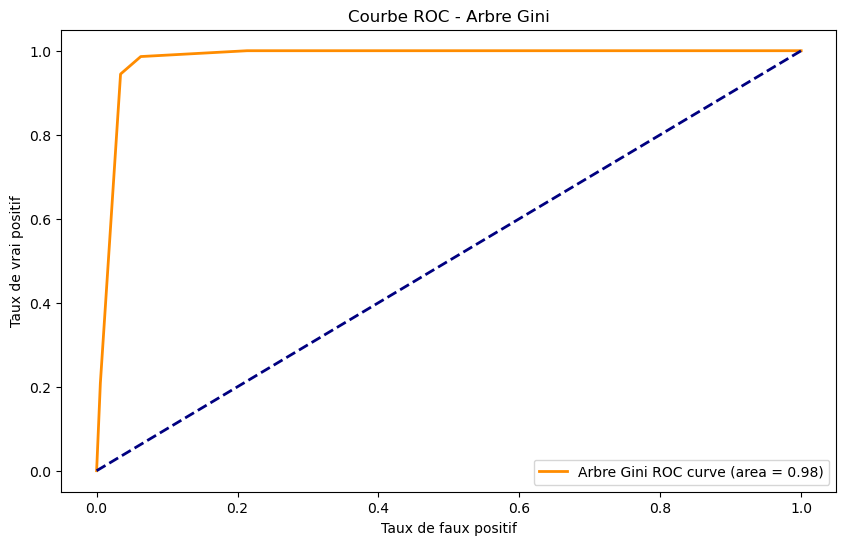

In [106]:
evaluate_model(clf2, X1_t, y1_t, "Arbre Gini",plot_roc=True)

Importance des variables explicatives (ordonnées par importance décroissante):
RM: 0.6530159132224469
F: 0.14270729813794808
Educ_1: 0.11402265545210505
DM: 0.09025413318749992
Age: 0.0
Exp: 0.0
CEL_Oui: 0.0
Educ_2: 0.0
Educ_3: 0.0


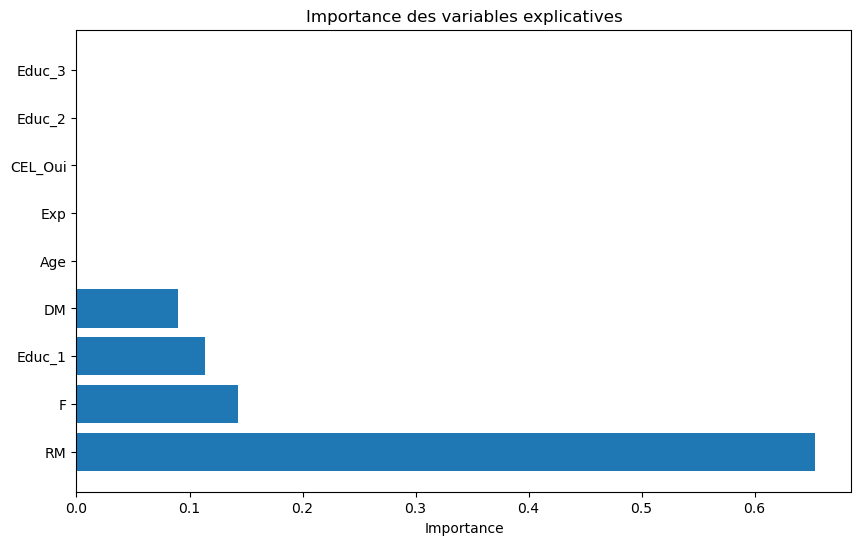

In [107]:
# Obtenir l'importance des variables explicatives
Importance = clf2.feature_importances_

# Associer l'importance à chaque nom de fonctionnalité
Noms = list(X_a.columns)
Importance_dict = dict(zip(Noms, Importance))

# Trier les variables par leur importance
Importance_Classer = {k: v for k, v in sorted(Importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Afficher l'importance des variables
print("Importance des variables explicatives (ordonnées par importance décroissante):")
for feature, importance in Importance_Classer.items():
    print(f"{feature}: {importance}")

# Tracer un graphique d'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(range(len(Importance_Classer)), list(Importance_Classer.values()), align='center')
plt.yticks(range(len(Importance_Classer)), list(Importance_Classer.keys()))
plt.xlabel('Importance')
plt.title('Importance des variables explicatives')
plt.show()

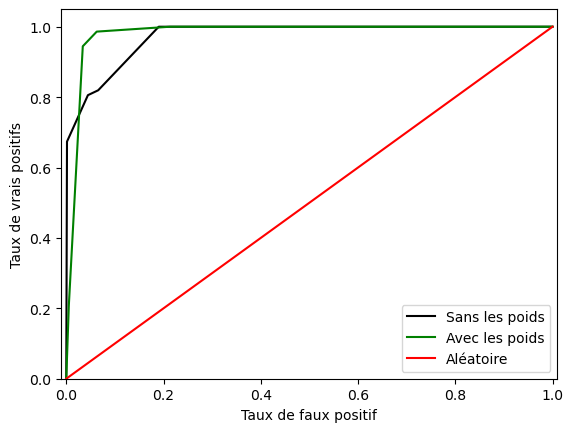

In [108]:
ypred1=clf1.predict_proba(X1_t)
ypred2=clf2.predict_proba(X1_t)

fpr1,tpr1,_=roc_curve(y1_t,ypred1[:,1])
fpr2,tpr2,_=roc_curve(y1_t,ypred2[:,1])


plt.plot(fpr1,tpr1,"k-",label="Sans les poids")
plt.plot(fpr2,tpr2,"g-",label="Avec les poids")

# Aléatoire
plt.plot([0,1],[0,1],"r-", label="Aléatoire")

plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([-0.01,1.01])
plt.ylim([0.0,1.05])
plt.legend()
plt.show()

In [159]:
# Créer le modèle de Random Forest
model2 = RandomForestClassifier(n_estimators=100,min_samples_split = 30,min_samples_leaf = 15,max_depth =8,random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
model2.fit(X_a, y_a)

fpr_RF,tpr_RF,auc_RF=evaluate_model(model2,X_t,y_t,"Random Forest")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- RMM
- const
Feature names seen at fit time, yet now missing:
- Age
- Educ_1
- Exp
- RM


## Prediction pour les nouvelles donnees ##

In [109]:
df_Nvlle=pd.read_csv("C:/Users/ASUS ROG Zephyrus S/Desktop/Downloads/Banque_Nvlle (1).csv", sep=";", decimal=",",encoding="latin1") 
df_Nvlle,df_Nvlle.shape

(    ID  Age  Experience  Revenu Millier    Famille  \
 0    1   64          39                 85        4   
 1    2   52          26                 28        2   
 2    3   58          34                 41        4   
 3    4   52          22                154        1   
 4    5   43          18                 41        1   
 5    6   56          32                 33        3   
 6    7   37          12                182        3   
 7    8   53          27                 59        2   
 8    9   27           2                129        2   
 9   10   53          27                 35        3   
 10  11   42          16                185        3   
 11  12   58          34                 45        4   
 12  13   36          12                 62        4   
 13  14   53          28                183        3   
 14  15   48          22                 14        2   
 15  16   54          28                 53        1   
 16  17   26           1                 48     

In [110]:
df_Nvlle.columns=['ID','Age','Exp','RM','F','DM','Educ','CEL']

In [111]:
df_Nvlle = pd.get_dummies(df_Nvlle, columns=(["CEL"]),drop_first=True).astype(int)
df_Nvlle[0:3]

ID  Age  Exp  RM  F    DM  Educ  CEL_Oui
0   1   64   39  85  4  3400     2        0
1   2   52   26  28  2   700     2        0
2   3   58   34  41  4   400     1        0

In [112]:
df_Nvlle = pd.get_dummies(df_Nvlle, columns=(["Educ"])).astype(int)
df_Nvlle[0:3]

ID  Age  Exp  RM  F    DM  CEL_Oui  Educ_1  Educ_2  Educ_3
0   1   64   39  85  4  3400        0       0       1       0
1   2   52   26  28  2   700        0       0       1       0
2   3   58   34  41  4   400        0       1       0       0

In [113]:
dfN=df_Nvlle.drop(columns=['ID'])
var = dfN.columns
print(var)

Index(['Age', 'Exp', 'RM', 'F', 'DM', 'CEL_Oui', 'Educ_1', 'Educ_2', 'Educ_3'], dtype='object')


In [114]:
proba_Nouveau=clf2.predict_proba(dfN)

In [115]:
pd.DataFrame(proba_Nouveau, columns=["Non", "Oui"]).sort_values(by='Oui',ascending=False)

Non       Oui
3   0.045969  0.954031
13  0.045969  0.954031
10  0.045969  0.954031
6   0.045969  0.954031
0   0.367001  0.632999
8   0.926779  0.073221
21  0.926779  0.073221
18  0.926779  0.073221
17  0.926779  0.073221
25  1.000000  0.000000
26  1.000000  0.000000
23  1.000000  0.000000
22  1.000000  0.000000
27  1.000000  0.000000
28  1.000000  0.000000
20  1.000000  0.000000
19  1.000000  0.000000
24  1.000000  0.000000
15  1.000000  0.000000
16  1.000000  0.000000
1   1.000000  0.000000
14  1.000000  0.000000
12  1.000000  0.000000
11  1.000000  0.000000
9   1.000000  0.000000
7   1.000000  0.000000
5   1.000000  0.000000
4   1.000000  0.000000
2   1.000000  0.000000
29  1.000000  0.000000

### Bagging

In [116]:
# Les arbres 
clf2 = DecisionTreeClassifier(class_weight='balanced',min_samples_split = 500,min_samples_leaf = 50,max_depth =5)
clf2.fit(X_a, y_a)
# Création du modéle
Bag_Arbre = BaggingClassifier(estimator=clf2,n_estimators=500,random_state=12)
Bag_Arbre.fit(X_a, y_a)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=5,
                                                   min_samples_leaf=50,
                                                   min_samples_split=500),
                  n_estimators=500, random_state=12)

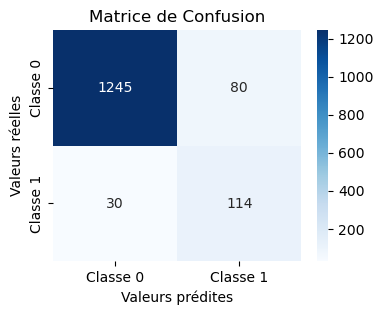

 Métriques d'évaluation pour le modèle Bagging Arbres : 
Exactitude: 0.9251191286589516
Précision: 0.588
Rappel: 0.7916666666666666
L'AUC du modèle Bagging Arbres est : 0.9636


TypeError: cannot unpack non-iterable NoneType object

In [117]:
fpr_Bag1, tpr_Bag1, auc_Bag1=evaluate_model(Bag_Arbre,X1_t,y1_t,"Bagging Arbres")

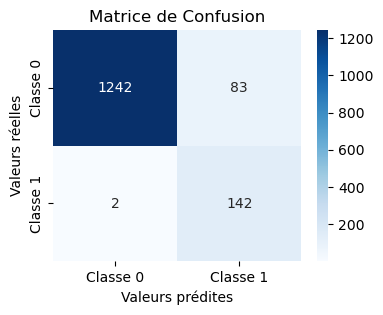

 Métriques d'évaluation pour le modèle Random Forest : 
Exactitude: 0.94213750850919
Précision: 0.631
Rappel: 0.9861111111111112
L'AUC du modèle Random Forest est : 0.9811


TypeError: cannot unpack non-iterable NoneType object

In [118]:
# Créer le modèle de Random Forest
clf2 = DecisionTreeClassifier(class_weight='balanced',min_samples_split = 500,min_samples_leaf = 50,max_depth =5)
clf2.fit(X_a, y_a)
# Entraîner le modèle sur l'ensemble d'entraînement
clf2.fit(X_a, y_a)

fpr_RF,tpr_RF,auc_RF=evaluate_model(clf2,X1_t,y1_t,"Random Forest")

#### **Boosting** ####

On va le faire avec des arbres.

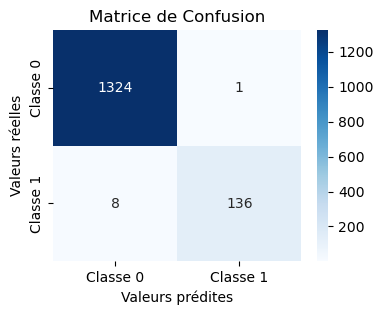

 Métriques d'évaluation pour le modèle AdaBoost : 
Exactitude: 0.9938733832539143
Précision: 0.993
Rappel: 0.9444444444444444
L'AUC du modèle AdaBoost est : 0.9954


TypeError: cannot unpack non-iterable NoneType object

In [119]:

Tree = DecisionTreeClassifier(class_weight='balanced',min_samples_split = 500,min_samples_leaf = 50,max_depth =5)
model3 = AdaBoostClassifier(estimator=Tree, n_estimators=500)

# Entraîner le modèle
model3.fit(X_a, y_a)

fpr_Ada,tpr_Ada,auc_Ada=evaluate_model(model3,X1_t,y1_t,"AdaBoost")

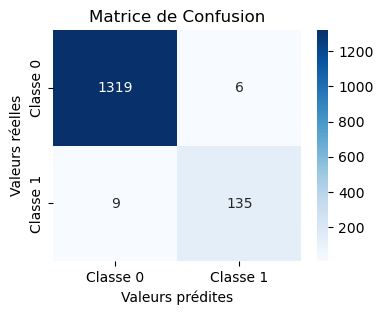

 Métriques d'évaluation pour le modèle Gradient Boosting : 
Exactitude: 0.989788972089857
Précision: 0.957
Rappel: 0.9375
L'AUC du modèle Gradient Boosting est : 0.9986


TypeError: cannot unpack non-iterable NoneType object

In [120]:
# Créer un modèle Gradient Boosting
model4 = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
model4.fit(X_a,y_a)

fpr_Boost,tpr_Boost,auc_Boost=evaluate_model(model4,X1_t,y1_t,"Gradient Boosting")

In [121]:
## Courbe ROC pour les 5 modèles

plt.plot(fpr_Bag1,tpr_Bag1,"b--",label='Bagging : (auc={:.3f}) '.format(auc_Bag1))
plt.plot(fpr_RF,tpr_RF,"r-",label='Random Forest : (auc={:.3f}) '.format(auc_RF))
plt.plot(fpr_Ada,tpr_Ada,"y-",label='AdaBoosting : (auc={:.3f}) '.format(auc_Ada))
plt.plot(fpr_Boost,tpr_Boost,"k-",label='GBoosting : (auc={:.3f}) '.format(auc_Boost))
# Aléatoire

plt.plot([0,1],[0,1],"k-")  #, label="Aléatoire"

# Parfait 

# Axes à l'origine
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.axhline(1, color='black',linewidth=0.5)
plt.axvline(1, color='black',linewidth=0.5)


# plt.plot([0,0,1], [0,1,1],"k-") # ,label="Parfait"
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.legend()
plt.suptitle("Courbe ROC ")
plt.show()

NameError: name 'fpr_Bag1' is not defined

# SVM ##

In [126]:
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import sys
from sklearn import svm
import seaborn as sns

In [127]:
def evaluate_model(model, X_test, y_true, model_name,plot_roc=False):
    # Faire des prédictions
    y_pred = model.predict(X_test)
    
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')

    plt.title('Matrice de Confusion')
    plt.show()

    # Calcul des métriques d'évaluation
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Affichage des métriques
    print('\033[1m',"Métriques d'évaluation pour le modèle {} :".format(model_name), '\033[0m')
    print("Exactitude:", accuracy)
    print("Précision:", round(precision, 3))
    print("Rappel:", recall)
    print("F1-score:", round(f1, 3))

    # Tracer la courbe ROC
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = auc(fpr, tpr)
    print("L'AUC du modèle {} est : {:.4f}".format(model_name, auc_score))
    
    if plot_roc:
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='{} ROC curve (area = {:.2f})'.format(model_name, auc_score))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('Taux de faux positif')
        plt.ylabel('Taux de vrai positif')
        plt.title('Courbe ROC - {}'.format(model_name))
        plt.legend(loc='lower right')
        plt.show()
    
    return fpr, tpr, auc_score  # Renvoie FPR,TPR et AUC

In [128]:
df4=pd.read_csv("C:/Users/ASUS ROG Zephyrus S/Desktop/Downloads/Banque.csv", sep=";", decimal=",",encoding="latin1") 
df4.head()

ID  Age  Exp  RMM  F    DM  Educ  CEL   PP
0   1   25    1   49  4  1600     1  Non  Non
1   2   45   19   34  3  1500     1  Non  Non
2   3   39   15   11  1  1000     1  Non  Non
3   4   35    9  100  1  2700     2  Non  Non
4   5   35    8   45  4  1000     2  Non  Non

In [129]:
df4=df4.drop(columns=['ID','Age','Exp'])
var = df4.columns
print(df4)

      RMM  F    DM  Educ  CEL   PP
0      49  4  1600     1  Non  Non
1      34  3  1500     1  Non  Non
2      11  1  1000     1  Non  Non
3     100  1  2700     2  Non  Non
4      45  4  1000     2  Non  Non
...   ... ..   ...   ...  ...  ...
4889   40  1  1900     3  Non  Non
4890   15  4   400     1  Non  Non
4891   24  2   300     3  Non  Non
4892   49  3   500     2  Non  Non
4893   83  3   800     1  Non  Non

[4894 rows x 6 columns]


In [130]:
df5 = pd.get_dummies(df4, columns=(["CEL","PP"]),drop_first=True).astype(int)
df5[0:3]

RMM  F    DM  Educ  CEL_Oui  PP_Oui
0   49  4  1600     1        0       0
1   34  3  1500     1        0       0
2   11  1  1000     1        0       0

In [131]:
df6 = pd.get_dummies(df5, columns=(['Educ'])).astype(int)
df6[0:3]

RMM  F    DM  CEL_Oui  PP_Oui  Educ_1  Educ_2  Educ_3
0   49  4  1600        0       0       1       0       0
1   34  3  1500        0       0       1       0       0
2   11  1  1000        0       0       1       0       0

In [132]:
df6 = sm.add_constant(df6)
df6[0:3]

const  RMM  F    DM  CEL_Oui  PP_Oui  Educ_1  Educ_2  Educ_3
0    1.0   49  4  1600        0       0       1       0       0
1    1.0   34  3  1500        0       0       1       0       0
2    1.0   11  1  1000        0       0       1       0       0

In [133]:
df6=df6.drop(columns=['DM'])
X=df6.drop(columns=['PP_Oui'])
X["CEL_Oui"]=X["CEL_Oui"].astype(int)
y=df6["PP_Oui"]
y=y.astype(int)
X.head()

const  RMM  F  CEL_Oui  Educ_1  Educ_2  Educ_3
0    1.0   49  4        0       1       0       0
1    1.0   34  3        0       1       0       0
2    1.0   11  1        0       1       0       0
3    1.0  100  1        0       0       1       0
4    1.0   45  4        0       0       1       0

In [134]:
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=452)
for train_index, test_index in strat.split(df6, df6["PP_Oui"]):
    strat_train = df6.loc[train_index]
    strat_test = df6.loc[test_index]
y3_a=strat_train["PP_Oui"]
X3_a=strat_train.drop(columns=["PP_Oui"])
y3_t=strat_test["PP_Oui"]
X3_t=strat_test.drop(columns=["PP_Oui"])

In [135]:
strat_train["PP_Oui"].value_counts(),
strat_train["PP_Oui"].value_counts(normalize=True)

PP_Oui
0    0.90219
1    0.09781
Name: proportion, dtype: float64

In [136]:
y3_a=strat_train["PP_Oui"]
y3_a.head(), type(y3_a)

(1225    0
 1615    0
 3646    0
 3049    0
 4823    0
 Name: PP_Oui, dtype: int32,
 pandas.core.series.Series)

In [137]:
X3_a=strat_train.drop(columns=["PP_Oui"])
X3_a.head(), type(X3_a)

(      const  RMM  F  CEL_Oui  Educ_1  Educ_2  Educ_3
 1225    1.0  110  1        0       1       0       0
 1615    1.0   73  1        0       0       1       0
 3646    1.0   43  3        0       0       0       1
 3049    1.0   50  4        0       0       0       1
 4823    1.0   28  1        0       0       0       1,
 pandas.core.frame.DataFrame)

In [138]:
clf4= svm.SVC(kernel='linear',probability=True)
clf4.fit(X3_a, y3_a)

SVC(kernel='linear', probability=True)

In [139]:
# Afficher les vecteurs de support
print("Nombre de Vecteurs de support:")
print(len(clf4.support_vectors_))

print("Vecteurs de support:")
print(clf4.support_vectors_[1:5])

Nombre de Vecteurs de support:
407
Vecteurs de support:
[[  1.  91.   4.   0.   0.   1.   0.]
 [  1. 101.   4.   0.   0.   0.   1.]
 [  1. 104.   2.   0.   0.   1.   0.]
 [  1. 113.   4.   0.   0.   0.   1.]]


#### Les scores de prédiction

In [140]:
ypred=clf4.predict(X3_t)

In [141]:
pd.DataFrame(ypred).value_counts()

0    1369
1     100
Name: count, dtype: int64

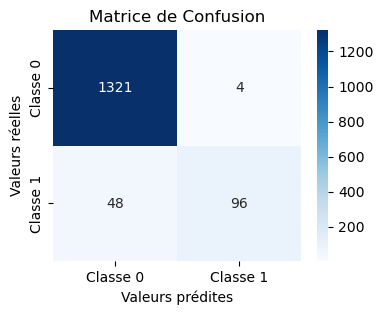

 Métriques d'évaluation pour le modèle SVM1 : 
Exactitude: 0.9646017699115044
Précision: 0.96
Rappel: 0.6666666666666666
F1-score: 0.787
L'AUC du modèle SVM1 est : 0.9445


In [142]:
FPR1,TPR1,AUC1=evaluate_model(clf4,X3_t,y3_t,"SVM1")

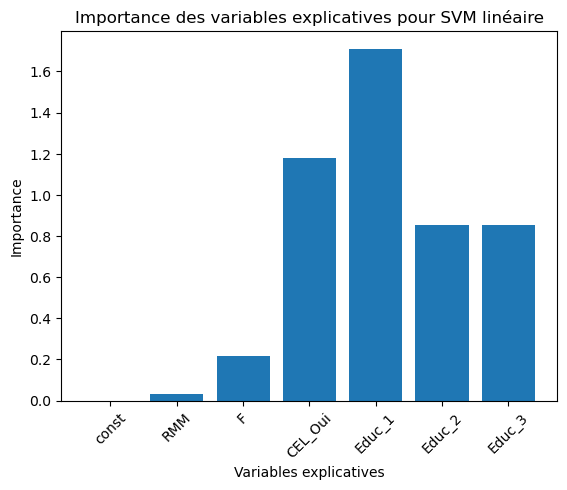

In [143]:
# Obtention des coefficients de support
coefficients = clf4.coef_

# Visualisation de l'importance des variables explicatives
fig, ax = plt.subplots()
ax.bar(range(X.shape[1]), np.abs(coefficients[0]))
ax.set_xticks(range(X.shape[1]))
ax.set_xticklabels(X.columns, rotation=45)
ax.set_xlabel('Variables explicatives')
ax.set_ylabel('Importance')
ax.set_title('Importance des variables explicatives pour SVM linéaire')

plt.show()

### Sélection des Hyperparamètres

In [144]:
parametres= { "kernel":["linear","poly","rbf","sigmoid"]}
svmC=SVC()
grille=GridSearchCV(estimator=svmC ,param_grid=parametres,scoring= 'roc_auc')
resultats= grille.fit(X3_t,y3_t)
print(resultats.best_params_)

{'kernel': 'poly'}


In [145]:
parametres= { "C":[0.1,1,10,20]}
svmC=SVC(kernel='poly')
grille=GridSearchCV(estimator=svmC ,param_grid=parametres,scoring='roc_auc')
resultats= grille.fit(X3_t,y3_t)
print(resultats.best_params_)

{'C': 20}


In [146]:
# Créer un modèle SVM linéaire
SVM2= svm.SVC(kernel='poly',C=20, probability=True)
SVM2.fit(X3_t, y3_t)

SVC(C=20, kernel='poly', probability=True)

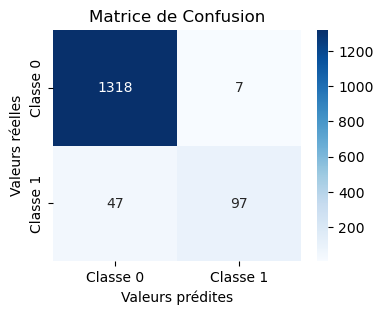

 Métriques d'évaluation pour le modèle SVM2 : 
Exactitude: 0.9632402995234853
Précision: 0.933
Rappel: 0.6736111111111112
F1-score: 0.782
L'AUC du modèle SVM2 est : 0.9720


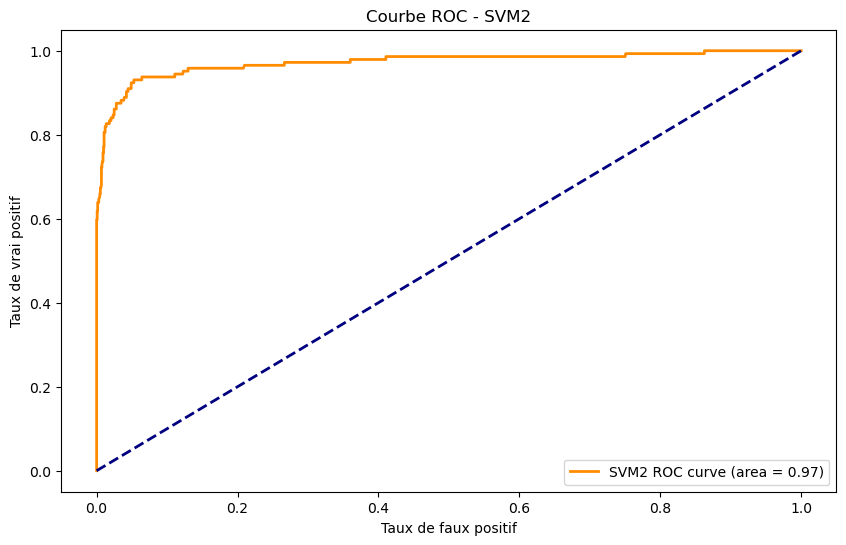

In [147]:
FPR2,TPR2,AUC2=evaluate_model(SVM2,X3_t,y3_t,"SVM2", plot_roc=True)

### On peut choisir un autre critère de sélection

In [148]:
parametres= { "kernel":["linear","poly","rbf","sigmoid"]}
svmC=SVC()
grille=GridSearchCV(estimator=svmC ,param_grid=parametres,scoring="accuracy")
resultats= grille.fit(X3_a,y3_a)
print(resultats.best_params_)

{'kernel': 'linear'}


In [149]:
parametres= { "C":[0.1,1,10,20]}
svmC=SVC(kernel='linear')
grille=GridSearchCV(estimator=svmC ,param_grid=parametres,scoring="accuracy")
resultats= grille.fit(X3_a,y3_a)
print(resultats.best_params_)

{'C': 1}


In [150]:
SVM3= svm.SVC(kernel='linear',C=1, probability=True)
SVM3.fit(X3_t, y3_t)

SVC(C=1, kernel='linear', probability=True)

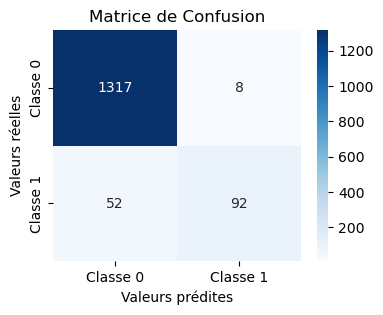

 Métriques d'évaluation pour le modèle SVM3 : 
Exactitude: 0.9591558883594282
Précision: 0.92
Rappel: 0.6388888888888888
F1-score: 0.754
L'AUC du modèle SVM3 est : 0.9589


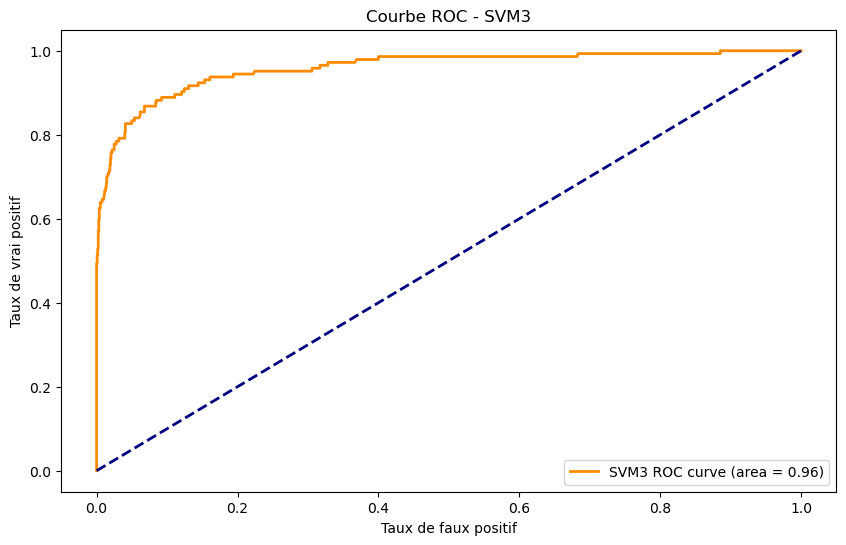

In [151]:
FPR2,TPR2,AUC2=evaluate_model(SVM3,X3_t,y3_t,"SVM3", plot_roc=True)

#### ***Courbes ROC ensembles*** ####

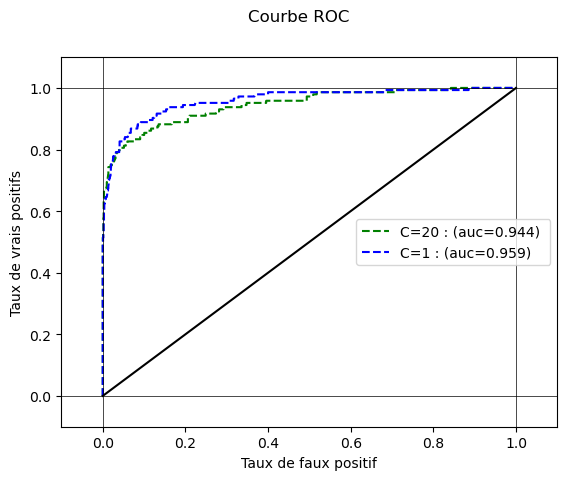

In [152]:
## Courbe ROC pour les 4 modèles

plt.plot(FPR1,TPR1,"g--",label='C=20 : (auc={:.3f}) '.format(AUC1))
plt.plot(FPR2,TPR2,"b--",label='C=1 : (auc={:.3f}) '.format(AUC2))

# Aléatoire

plt.plot([0,1],[0,1],"k-")

# Axes à l'origine
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.axhline(1, color='black',linewidth=0.5)
plt.axvline(1, color='black',linewidth=0.5)

# plt.plot([0,0,1], [0,1,1],"k-") # ,label="Parfait"
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.legend()
plt.suptitle("Courbe ROC ")
plt.show()

In [153]:
# Une fonction pour avoir la liste et surtout le nombre de chaque éléments dans un array
from collections import Counter
Counter(y)

Counter({0: 4415, 1: 479})

## *SVM Donnees desequilibres avec poids* ##

In [154]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
X,y

(      const  RMM  F  CEL_Oui  Educ_1  Educ_2  Educ_3
 0       1.0   49  4        0       1       0       0
 1       1.0   34  3        0       1       0       0
 2       1.0   11  1        0       1       0       0
 3       1.0  100  1        0       0       1       0
 4       1.0   45  4        0       0       1       0
 ...     ...  ... ..      ...     ...     ...     ...
 4889    1.0   40  1        0       0       0       1
 4890    1.0   15  4        0       1       0       0
 4891    1.0   24  2        0       0       0       1
 4892    1.0   49  3        0       0       1       0
 4893    1.0   83  3        0       1       0       0
 
 [4894 rows x 7 columns],
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4889    0
 4890    0
 4891    0
 4892    0
 4893    0
 Name: PP_Oui, Length: 4894, dtype: int32)

In [155]:
X

const  RMM  F  CEL_Oui  Educ_1  Educ_2  Educ_3
0       1.0   49  4        0       1       0       0
1       1.0   34  3        0       1       0       0
2       1.0   11  1        0       1       0       0
3       1.0  100  1        0       0       1       0
4       1.0   45  4        0       0       1       0
...     ...  ... ..      ...     ...     ...     ...
4889    1.0   40  1        0       0       0       1
4890    1.0   15  4        0       1       0       0
4891    1.0   24  2        0       0       0       1
4892    1.0   49  3        0       0       1       0
4893    1.0   83  3        0       1       0       0

[4894 rows x 7 columns]

In [156]:
from collections import Counter
Counter(y)

Counter({0: 4415, 1: 479})

In [157]:
clf5 = svm.SVC(kernel="linear", class_weight={1: 10}, probability=True)
#clf1 = svm.SVC(kernel="linear", class_weight='balanced', probability=True)
clf5.fit(X, y)

SVC(class_weight={1: 10}, kernel='linear', probability=True)

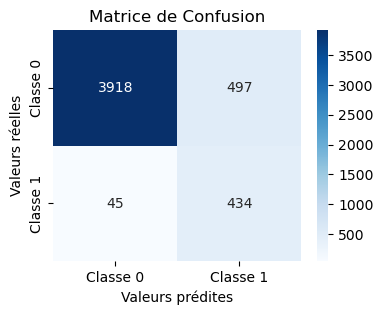

 Métriques d'évaluation pour le modèle Avec poids : 
Exactitude: 0.8892521454842665
Précision: 0.466
Rappel: 0.906054279749478
F1-score: 0.616
L'AUC du modèle Avec poids est : 0.9603


In [158]:
tpr1,fpr1,auc1=evaluate_model(clf5,X,y,"Avec poids")